# Atividade 3 - Cálculo Numérico

    Lucas Corlete Alves de Melo - 13676461
    Jean Carlos Pereira Cassiano - 13864008
    João Victor de Almeida - 13695424

## Atenção!
Pelo fato desta atividade ser mais extensa que as anterirores, deixamos as partes que compõem o relatório ao final de cada célula de código do respectivo exercício, para facilitar a leitura.

In [35]:
# Célula para importar todas as bibliotecas que foram necessárias para construção do trabalho.
# (Pela quantidade de bibliotecas acahamos que isso não é uma boa prática. Talvez tivesse sido melhor chamar a biblioteca quando fosse necessário)

import matplotlib.pyplot as plt

import scipy as sp
from scipy.optimize import fsolve
import numpy as np

import matplotlib

import random
import time

from scipy import sparse
from scipy.sparse.linalg import spsolve


from numpy.linalg import matrix_rank


from scipy import linalg


from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

import scipy.sparse.linalg

from scipy.interpolate import interp1d

import matplotlib.cm as cm

import sklearn.metrics as skl
from tabulate import tabulate

from scipy import integrate
import matplotlib.animation as animation

#Parte 1 - Problemas não lineares

##Exo.A

Neste exercício, consideraremos o **método de Newton** para determinar o zero $\bar x$ de uma função.  
Construimos inicialmente os recursos para realizaçao dos itens desse exercício, isto é, a função que descreve o método e os dados fornecidos pelo enunciado.

In [36]:
# (a) Função que implementa o método de Newton (escalar)
def Newton(func, derfunc, x0, tol, max_iter):

    n = 0
    error = np.inf
    xold = x0
    lst_erros = []
    lst_iter = []
    while(error > tol and n < max_iter):

        xnew = xold - func(xold) / derfunc(xold)

        error = np.abs(xnew - xold)
        lst_erros.append(error)
        lst_iter.append(n)

        print('iter=', n, ' erro=', error, ' func(x)=', func(xnew))

        xold = xnew

        n += 1

    return xnew


# (b) Implementações das derivadas

#Derivada por diferenciação numérica, a outra derivada será feita a mão
def derfunc_difnum(func, x, h):
    return (func(x + h) - func(x)) / h


# (c) Exemplo (mutável)

def f(x):
  return x**3 - 30.0*x**2 + 2552.0

def derfunc(x):
  return 3.0*x**2 - 60.0*x

# def f(x):
#   return np.exp(x) - 2

# def derfunc(x):
#   return np.exp(x)

x0 = 3
h = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7] #nominal
tol = 1.0e-12
max_iter = 100

ti_n = time.time()
sol = Newton(f, derfunc, x0, tol, max_iter)
tf_n = time.time() - ti_n

print("\nTemos, então, o zero da função pelo método de Newton:", sol)
print("O tempo para se encontrar o zero da função pelo método de Newton foi de ", tf_n, 's.')
print("\n\n")


derf = derfunc(x0)
derf_difnum = []

for i in range(len(h)):
  derf_difnum.append(derfunc_difnum(f, x0, h[i]))

print("Derivada de f(x) no ponto x0 =", x0, ", pela resolução analítica: f'(x0) =", derf, '\n')

for i in range(len(h)):
  print("\nDerivada, por diferenciação numérica, em x0, para o parâmetros algorítmicos h =", h[i], ":", derf_difnum[i])


# (d) Comparação de resultados
time_fs = 0
ti_fs = time.time()
sol2 = fsolve(f, x0)
tf_fs = time.time() - ti_fs

print("\n\nZero da função, pelo fsolve():", sol2)
print("O tempo para se encontrar o zero da função pelo fsolve foi de ", tf_fs, 's.')

dersol2 = fsolve(derfunc, x0)
print("\nDerivada, utilizando o fsolve, em x0:", dersol2, '\n')

iter= 0  erro= 15.091503267973856  func(x)= -1345.6806384450201
iter= 1  erro= 12.991361674749696  func(x)= 1904.318720697976
iter= 2  erro= 8.353221687364206  func(x)= -442.82514772121385
iter= 3  erro= 1.6759532877726162  func(x)= 24.39217142306643
iter= 4  erro= 0.08395968079546101  func(x)= 0.03817995579447597
iter= 5  erro= 0.00013183417406992248  func(x)= 9.705581760499626e-08
iter= 6  erro= 3.3513281039176945e-10  func(x)= -4.547473508864641e-13
iter= 7  erro= 1.7763568394002505e-15  func(x)= 9.094947017729282e-13

Temos, então, o zero da função pelo método de Newton: 11.861501508120412
O tempo para se encontrar o zero da função pelo método de Newton foi de  0.015649795532226562 s.



Derivada de f(x) no ponto x0 = 3 , pela resolução analítica: f'(x0) = -153.0 


Derivada, por diferenciação numérica, em x0, para o parâmetros algorítmicos h = 0.1 : -155.09000000000015

Derivada, por diferenciação numérica, em x0, para o parâmetros algorítmicos h = 0.01 : -153.20990000000165

Deri

Utilizando o método de Newton e a função *fsolve()* para determinar a solução, nota0se que ambos dão resultados muito próximos, de modo que não é imediato, para o grupo, dizer qual recurso nos retorna a solução da maneira mais otimizada. Por causa disso, foi também calculado o tempo de execução pelos dos meios para ralizarmos a comparação.
Nesse sentido, observamos que o *fsolve()* é uma utiização mais otimizada para o exemplo  que escolhemos pois realiza a operação em um tempo menor de execução.  

Agora, para o cálculo da derivada da função por **diferenciação numérica**, foram utilizados sete valores de teste do parâmetro $h$. Percebemos, então, que para o nosso exemplo quanto menor o parâmetro, mais preciso foi o resultado obtido - mas com algumas oscilações, por exemplo, para $h=0.1$ e $h=0.01$ -.

##Exo.B

Inicialmente, vamos definir as funções para realização do exercício e aplicar os dados fornecidos pelo enunciado.

In [37]:
# Função para criar uma rede hidraulica com forma de grade quadrada
def GeraRede(n,m,CH,CV):
    nv = n*m
    nc = (n-1)*m + (m-1)*n

    coord = np.zeros(shape=(nv,2))

    for i in range(n):
      for j in range(m):
        ig = i + j*n
        coord[ig,0] = i
        coord[ig,1] = j

    conec = np.zeros(shape=(nc,2), dtype=int)
    C = np.zeros(nc)

    # Loop sobre canos horizontais
    for j in range(m):
        for i in range(n-1):
          k = j*(n-1) + i
          conec[k,0] = j*n + i
          conec[k,1] = j*n + i+1
          C[k] = CH

    # Loop sobre canos verticais
    for i in range(n):
      for j in range(m-1):
          k = (n-1)*m + j*n + i
          conec[k,0] = i + j*n
          conec[k,1] = i + (j+1)*n
          C[k] = CV

    return nv, nc, conec, C, coord


# Primeiro, definindo a montagem de uma matriz global do sistema de equações
def Assembly(nv, nc, C, conec):
    A = np.zeros(shape=(nv,nv))
    for k in range(nc):
        Cloc = np.array([ [C[k] , -C[k]], [-C[k] , C[k] ] ])
        p = conec[k,0]
        q = conec[k,1]
        A[p,p] += Cloc[0,0]
        A[q,q] += Cloc[1,1]
        A[p,q] += Cloc[0,1]
        A[q,p] += Cloc[1,0]
    return A


# Depois, função para plotar o gráfico de pressões.
def PlotPressure(n, m, pressure):
    x = np.arange(0, n, 1)
    y = np.arange(0, m, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (m,n)
    fig, ax = plt.subplots(figsize=(7,7))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    cp = plt.contourf(X, Y, Z, 15, cmap='jet')
    cb = plt.colorbar(cp)
    plt.show()


#Tomemos duas funções ResolveRede[tipo] para resolução de cada tipo de conexão.

# Resolução Rede tipo 1.
def ResolveRede1(nv, nc, C, conec, natm, nB, QB):
    A = Assembly(nv, nc, C, conec)

    Atilde = np.copy(A)
    Atilde[natm,:] = 0.0
    Atilde[natm,natm] = 1.0
    b = np.zeros(nv, dtype=float)
    b[nB] = QB
    return np.linalg.solve(Atilde, b)

In [38]:
# Gerando função que retorna a potencia
def potencia(n, m, natm, nB, QB, x):
    ch = CH(x)
    cv = CV(x)

    nv, nc, conec, C, coord = GeraRede(n, m, ch, cv)

    # Criando as funções para gerar as matrizes auxiliares K e D
    def matrizes_aux(nv, nc, C, connec):
        # Criando a matriz K (diagonal)

        K = np.zeros(shape=(nc,nc))

        for i in range(nc):
            K[i][i] = C[i]

        # Criando a matriz D
        D = np.zeros(shape=(nc,nv))

        for k in range(nc):
            for j in range(nv):
                if(j == connec[k][0]):
                    D[k][j] = 1
                elif (j == connec[k][1]):
                    D[k][j] = -1

        return K, D


    # Calculando a potência da rede (com alteração nos parâmetros)
    def retornaW(K, D, p1):
        X = K@D  #nos dá que W = p_t(D_t X)p, tal que X = KD
        Y = D.T @ X
        Z1 = Y@p1

        return p1.T @ Z1


    p1 = ResolveRede1(nv, nc, C, conec, natm, nB, QB)

    K, D = matrizes_aux(nv, nc, C, conec)

    W = retornaW(K, D, p1)

    return W

In [39]:
# VERSÃO VETORIZADA DA FUNÇÃO QUE RETORNA A POTÊNCIA (será utilizada na Parte 3)
def potencia_vet(x):
    if (type(x) == np.float64):
        #K, D = potencia(n, m, natm, nB, QB, x)
        W = potencia(n, m, natm, nB, QB, x)
        return W

    W = []
    for i in x:
        W.append(potencia(n, m, natm, nB, QB, i))
    return W

In [40]:
# Dados para Rede (Tipo 1)

n, m = 8, 9
QB = 3
natm = n*m-1 #isso porque o índice começa em zero e vai até o último digíto -1.
nB = 0

#Definindo as condutâncias em função de x: (basta alterar o que é e o que não é comentário para mudar as funções)

# def CH(x):
#   return (2.3 + 0.1*(x-1)**2)

# def CV(x):
#   return (1.8 + 0.2*(x-1)**2)


def CH(x):
  return (2.3 + 10.0*np.exp(-(x-5)**2))

def CV(x):
  return (1.8 + 10.0*np.exp(-(x-5)**2))


#x = 1.5 #Vamos pegar vários valores de x
x = np.arange(3.1, 7.1, 0.1) # Vamos selecionar aqui os valores de x que queremos varrer

W = []

for i in range(len(x)):

  W.append(potencia(n, m, natm, nB, QB, x[i]))

print("\nLista de potências para cada valor de x analidados:\n\n")

for i in range(len(x)):
  print("Para x =", x[i], "temos que nossa rede consome uma potência de W =", W[i])


Lista de potências para cada valor de x analidados:


Para x = 3.1 temos que nossa rede consome uma potência de W = 11.110472990017607
Para x = 3.2 temos que nossa rede consome uma potência de W = 10.545952888206
Para x = 3.3000000000000003 temos que nossa rede consome uma potência de W = 9.867209218906753
Para x = 3.4000000000000004 temos que nossa rede consome uma potência de W = 9.093159885814837
Para x = 3.5000000000000004 temos que nossa rede consome uma potência de W = 8.256546633058308
Para x = 3.6000000000000005 temos que nossa rede consome uma potência de W = 7.3982727380698625
Para x = 3.7000000000000006 temos que nossa rede consome uma potência de W = 6.559434382855755
Para x = 3.8000000000000007 temos que nossa rede consome uma potência de W = 5.774168790711985
Para x = 3.900000000000001 temos que nossa rede consome uma potência de W = 5.065630333701351
Para x = 4.000000000000001 temos que nossa rede consome uma potência de W = 4.445524091033625
Para x = 4.100000000000001 



Gráfico de potência como função de x:



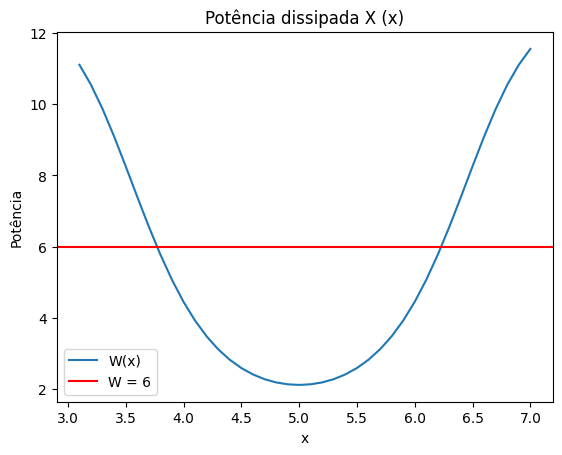

In [41]:
# Listas para armazenar os valores de x e potência
x_values = []
pot_values = []

print('\n')
# Loop para variar o valor de x
for x in np.arange(3.1, 7.1, 0.1):
    W = potencia(n, m, natm, nB, QB, x)
    x_values.append(x)
    pot_values.append(W)
    #print("Para x =", x, "temos que nossa rede consome uma potência de W =", W)   #NÃO PRECISAMOS PRINTAR A LISTA DE NOVO NE
    # if(W<6.0):
    #   break


print("Gráfico de potência como função de x:\n")
# Plot da potência em função de x
plt.plot(x_values, pot_values,)
plt.xlabel('x')
plt.ylabel('Potência')
plt.title('Potência dissipada X (x)')

# Linha vertical para f(x) = 6
plt.axhline(y=6, color='red', linestyle='-', label='W = 6')

plt.legend(['W(x)', 'W = 6'])
plt.show()


In [42]:
# Encontrando x tal que W(x) = 6
def equation(x):
    W = potencia(n, m, natm, nB, QB, x)
    return W - 6

# Encontrando a solução da equação usando fsolve
ti = time.time()
solf = fsolve(equation, x0)
tf = time.time() - ti

print("A potência é igual a 6 quando x =", solf[0]) #Quando há mais que um zero de função, por que o fsolve() só me retorna a primeira solução encontrada? E como forçá-lo a me dar as duas?
print("\nTempo de execução para achar a solução pelo fsolve():", tf,"s.")

A potência é igual a 6 quando x = 3.7703257926580354

Tempo de execução para achar a solução pelo fsolve(): 0.2155923843383789 s.


Para nossa anÁlise, foram listados os valores de potência consumida em função de x e foi plotado o gráfico para observação da curva dadas as condutâncias como funções de x.

Por inpeção do gráfico, podeos determinar que a solução está contida no intervalo de $x\in (3.5, 4.0)$ - claro, matematicamente há mais de uma solução, mais independente do método utilizado, para forma implementada, é encontrada a primeira solução -.  

Foi uitilzada a função *fsolve()* para achar a solução para $W(x) = 6$ - ou seja, o zero da função $f(x) = W(x) - 6$ -. Além disso, foi calculado o tempo de execução para esta resolução - foi bem maior do que no exercício anterior.

# Parte 2 - Sistemas Sobredeterminados

##Exo. 1

Nesta questão, quremos demonstrar o teorema das equações normais:
$$
||Ax - b||_{G}^{2} = (Ax-b)^{T}G(Ax-b) = (Ax^* + Ad -b)^{T}G(Ax^* + Ad -b)
$$
$$
||Ax - b||_{G}^{2} = ||Ax^* - b||_{G}^{2} + 2d^T(A^TGAx^* - A^TGb) + ||Ad||_{G}^{2}
$$

Tal que $A∈\mathbb{R}^{mxn}$ ;  $x = x^*+d$ , com $d\in\mathbb{R}^n$; $G\in\mathbb{R}^{mxm}$

Iniciemos, então, nossa demosntração:

$$
||Ax - b||_{G}^{2} = (Ax-b)^{T}G(Ax-b) = (Ax^* + Ad -b)^{T}G(Ax^* + Ad -b)
$$

$$
= (Ax^*-b)^{T}G(Ax^* + Ad -b) +(Ad)^TG(Ax^* + Ad -b)
$$
$$
= (Ax^*-b)^{T}G(Ax^* -b) + (Ax^*-b)^{T}GAd +(Ad)^TG(Ax^*-b) +(Ad)^TGAd
$$
$$
= ||Ax^*-b||_{G}^{T} + (Ax^*-b)^{T}GAd + (Ad)^TG(Ax^*-b) +||Ad||_{G}^{2}
$$

Agora, vamos trabalhar com o termo $y = (Ax^*-b)^{T}GAd + (Ad)^TG(Ax^*-b)$
Nesse sentido,

$$
y= (Ax^*)GAd - bGAd + d^TA^TGAx^* + d^TA^TGAb
$$

$$
= (Ax^*)GAd - bGAd + d^T(A^TGAx^* + A^TGAb)
$$

Em seguida, temos que trabalhar com o termos $(Ax^*)GAd - bGAd$

$$
(Ax^*)GAd - bGAd = (Ax^*G-bG)Ad
$$
$$
= (Ax^*G-bG)(d^TA^T)^T
$$
$$
= [(d^TA^T)(Ax^*G-bG)^T]^T
$$

Entretanto,  note que um dos termos da iguladade acima é um escalar, isto é,

$$
(Ax^*G-bG)^T = (Ax^*G-bG)
$$

Então,

$$
(Ax^*)GAd - bGAd = [(d^TA^T)(Ax^*G-bG)]^T
$$

$$
= [d^T(A^TAx^*A^TG-bG)]^T
$$

Perceba, também, que ainda temos um escalar em jogo, de modo que

$$
[d^T(A^TAx^*A^TG-bG)]^T = d^T(A^TAx^*A^TG-bG)
$$

Ou seja, voltando para $y$

$$
y = d^T(A^TAx^*A^TG-bG) + d^T(A^TAx^*A^TG-bG) = 2d^T(A^TAx^*A^TG-bG)
$$

Assim, substituindo $y$ na nossa equação inicial provamos, de fato, que

$$
||Ax - b||_{G}^{2} = ||Ax^*-b||_{G}^{T} + (Ax^*-b)^{T}GAd + (Ad)^TG(Ax^*-b) +||Ad||_{G}^{2}
$$

$$
= ||Ax^*-b||_{G}^{T} + 2d^T(A^TAx^*A^TG-bG) +||Ad||_{G}^{2}
$$

## Exo.2

Dada uma base ortogonal de $col(A)$ formada pelos vetores {$ q^{(1)}, q^{(2)}, . . . , q^{(r)}$}, queremos provar que,
na projeção ortogonal de $b$ sobre $col(A)$, definida como:

$$
b^{\perp} = \Bbb Pb = \sum_{i=1}^{r}((q^{(i)})^Tb)q^{(i)}
$$

Tal que o operador $\Bbb P = Q_{1}Q_{1}^T$, em que a matriz $Q_{1}\in\mathbb{R}^{mxn}$ é formada pelos vetores $q^{(i)}$, ou seja, consiste nas primeiras $n$ colunas de $Q\in\mathbb{R}^{mxm}$ (ortogonal).

Iniciemos, então, nossa demonstração:

Com base no que queremos, vamos enunciar e demonstrar a seguinte propriedade:

1. Seja $\Bbb P$ o perdor linear tal que  
  $$\Bbb P = Q_{1}Q_{1}^T$$

  Verifica-se, então, que
  $$Q_{1} =
  \begin{pmatrix}
    q_{11} & q_{12} & ... & q_{1n} \\
    q_{21} & q_{22} & ... & q_{2n} \\
    . & . & ... & . \\
    . & . & ... & . \\
    q_{m1} & q_{m2} & ... & q_{mn} \\
  \end{pmatrix}=
  \begin{pmatrix}
    | & | & ... & | \\
    q^{(1)} & q^{(2)} & ... & q^{(n)} \\
    | & | & ... & | \\
  \end{pmatrix}
  $$

  Com isso, podemos ver que
  $$ Q_{1}Q_{1}^{T} =
  \begin{pmatrix}
    | & | & ... & | \\
    q^{(1)} & q^{(2)} & ... & q^{(n)} \\
    | & | & ... & | \\
  \end{pmatrix}
  \begin{pmatrix}
    - & (q^{(1)})^{T} & - \\
    - & (q^{(2)})^{T} & - \\
    & ... \\
    - & (q^{(n)})^{T} & - \\
  \end{pmatrix}
  $$

  Desse modo, podemos escrever que
  $$ Q_{1}Q_{1}^{T}b =
  \begin{pmatrix}
    | & | & ... & | \\
    q^{(1)} & q^{(2)} & ... & q^{(n)} \\
    | & | & ... & | \\
  \end{pmatrix}
  \begin{pmatrix}
    - & (q^{(1)})^{T} & - \\
    - & (q^{(2)})^{T} & - \\
    & ... \\
    - & (q^{(n)})^{T} & - \\
  \end{pmatrix}b=
  $$

  $$ Q_{1}Q_{1}^{T}b =
  \begin{pmatrix}
    | & | & ... & | \\
    q^{(1)} & q^{(2)} & ... & q^{(n)} \\
    | & | & ... & | \\
  \end{pmatrix}
  \sum^{n}_{i=1} (q^{(i)})^{T}b
  $$  
\
  Note que $\sum^{n}_{i=1} (q^{(i)})^{T}b \in \mathbb{R}$, ou seja, podemos comutar esse termo:  

  
  $$ Q_{1}Q_{1}^{T}b =
  (\sum^{n}_{i=1} (q^{(i)})^{T}b)
  \begin{pmatrix}
    | & | & ... & | \\
    q^{(1)} & q^{(2)} & ... & q^{(n)} \\
    | & | & ... & | \\
  \end{pmatrix}=
  [ \sum^{n}_{i=1} (q^{(i)})^{T}b ](q^{(i)})
  $$
  $$
  Q_{1}Q_{1}^{T}b = \sum^{n}_{i=1} (q^{(i)})^{T}q^{(i)}b
  $$  

  
Assim, como queriamos demonstrar, $\Bbb P = Q_{1}Q_{1}^T = \sum^{n}_{i=1} (q^{(i)})^{T}q^{(i)}$.


<!-- Demonstração para questão 3 desta parte, caso seja útil -->
<!--
\
2. Conhecendo $A$ e $Q_{1}$, temos que

  $$
  Q_{1}^{T}Q_{1} = I_{nxn}
  $$

  Verifica-se, então, que

  $$ Q_{1}^{T}Q_{1} =
  \begin{pmatrix}
    - & (q^{(1)})^{T} & - \\
    - & (q^{(2)})^{T} & - \\
    & ... \\
    - & (q^{(n)})^{T} & - \\
  \end{pmatrix}
  \begin{pmatrix}
    | & | & ... & | \\
    q^{(1)} & q^{(2)} & ... & q^{(n)} \\
    | & | & ... & | \\
  \end{pmatrix}=
  $$

  $$ =
  \begin{pmatrix}
    (q^{(1)})^Tq^{(1)} & (q^{(1)})^Tq^{(2)} & ... & (q^{(1)})^Tq^{(n)} \\
    (q^{(2)})^Tq^{(1)} & (q^{(2)})^Tq^{(2)} & ... & (q^{(2)})^Tq^{(n)} \\
    ... & ... &  & ... \\
    (q^{(n)})^Tq^{(1)} & (q^{(n)})^Tq^{(2)} & ... & (q^{(n)})^Tq^{(n)} \\
  \end{pmatrix}
  $$  
\
  Além disso, sabemos que os vetores coluna $q^{(i)}$ são ortonormais, então

  $$
  \begin{cases}
  q^{(i)}q^{(j)} = 1,& se & i=j\\
  q^{(i)}q^{(j)} = 0,& se & c.c\\
  \end{cases}
  $$
\
  Desse modo,

  $$ Q_{1}^{T}Q_{1} =
  \begin{pmatrix}
    (q^{(1)})^Tq^{(1)} & 0 & ... & 0 \\
    0 & (q^{(2)})^Tq^{(2)} & ... & 0 \\
    ... & ... &  & ... \\
    0 & 0 & ... & (q^{(n)})^Tq^{(n)} \\
  \end{pmatrix}=
  \begin{pmatrix}
    1 & 0 & ... & 0 \\
    0 & 1 & ... & 0 \\
    ... & ... &  & ... \\
    0 & 0 & ... & 1 \\
  \end{pmatrix} = I_{nxn}
  $$
\
  Assim, como queriamos demonstrar, $Q_{1}^{T}Q_{1}$ é a identidade de ordem $n$.   -->


## Exo.3

In [43]:
m = 6 #Podemos alterar os indices a vontade para testar para diferentes tamanhos das matrizes
n = 4 #Importante: m >= n

if (m>=n):
  A = np.random.rand(m,n)
  b = np.random.rand(m)
  Q, R = scipy.linalg.qr(A)

  Q1 = Q[:, 0:n]
  #R1 = R[0:n,0:n]
  #xqr = scipy.linalg.solve(R1, Q1.T@b)
  #print('solução baseada em QR', xqr)

  I = Q1.T @ Q1
  print("I =\n", I)

else:
  print("Determine dimensões válidas para que seja possível a fatoração!")

I =
 [[ 1.00000000e+00  4.11578790e-17  8.48899290e-17 -1.94082901e-16]
 [ 4.11578790e-17  1.00000000e+00  3.94771832e-17  6.46467391e-18]
 [ 8.48899290e-17  3.94771832e-17  1.00000000e+00 -1.04730418e-16]
 [-1.94082901e-16  6.46467391e-18 -1.04730418e-16  1.00000000e+00]]


Este exercício se baseia na fatoração QR de uma matriz $A\in \mathbb{R}^{(mxn)}$ na resolução do sistema
$$
Ax = b
$$
tal que $b\in\mathbb{R}^m$.
Nesse sentido, temos que
$$
A = QR
$$
de modo que $Q\in\mathbb{R}^{mxm}$ uma matriz ortogonal e $R\in\mathbb{R}^{mxn}$ uma triangular (trapezoidal) superior, com $r_{ii}>0$ $\forall i$.
Agora, tomemos a matriz $Q_1\in\mathbb{R}^{mxn}$ formada pelas primeiras $n$ colunas de $Q$.
Em vista de tais definições, queremos, pela verificação do computador, mostrar que
$$
Q_1^TQ_1 = I_{m}
$$
tal que $I_{m}$ é a matriz identidade de ordem $m$.
Note, pelo _output_ do código, que
$$
I_{ij} \left \{ \begin{matrix} =1, & \mbox{se }\mbox{i = j} \\ \simeq0, & \mbox{se}\mbox{ i }\neq\mbox{j} \end{matrix} \right.
$$

Isso, na verdade, nos mostra que a relação buscada é, de fato, **verdadeira**, pois o fato dos elementos da matriz não anularem exatamente faz sentido uma vez que o computador não realiza cálculos exatos, pois demandaria um custo de memória excessivo - o que ficaria desde de inviável  a impossível quando as opeações fossem realizadas com números irracionais, por exemplo. Em suma, para todo elemento elemento muito pequeno, podemos considerá-lo como zero, o que nos diz, assim, que $I$ é a identidade.

## Exo.4

  Tanto para realização do primeiro quanto do segundo caso estocástico, precisamos variar os valores da seguinte maneira:

  #### 1° caso:
    sampling_stoch = 1
    TOLr = 1e-8

  #### 2° caso:
    sampling_stoch = {100, 1000, 10000, 100000}
    TOLr = 1e-2

Para que fique prático e exija menos recursos computacionais, o algoritmo *Grads.ipynb* foi executado para todos os casos descritos acima. Então, foram tirados prints dos plots de máxima descida e adicionados ao relatório deste exercício.

No código a seguir, estão devidamente apontados os locais onde foram necessários fazer as mudanças, de modo que basta colocar os valores de interesse, executar a célula e compara com a respectiva imagem do relatório.

0   10.034669965619258
1   18.375255628294006
2   2.932380403013488
3   4.448670148605457
4   1.003052480708429
5   3.3584353726250473
6   0.2936285086163216
7   0.08184641161439107
8   0.2997476902195477
9   0.08334859594186639
10   0.06652155630490633
11   0.08527324946205542
12   0.07047004378441804
13   0.06622669956726356
14   0.018145255954281833
15   0.08238199575490911
16   0.032764625471284566
17   0.026115154465572922
18   0.0650647651769336
19   0.06535204340342893
20   0.019895721692462422
21   0.014821078214403136
22   0.014768505194239707
23   0.022986174349943066
24   0.03098878687731253
25   0.018253892590669025
26   0.029448905049448984
27   0.016938063300771723
28   0.01497721049901087
29   0.027834078088929414
30   0.032885215073339046
31   0.011029169301050603
32   0.01986682087748577
33   0.02476217547036222
34   0.028602330974484894
35   0.03594301339948423
36   0.028234827034262312
37   0.03976184526947001
38   0.027582313828850402
39   0.016078633171933587
40   

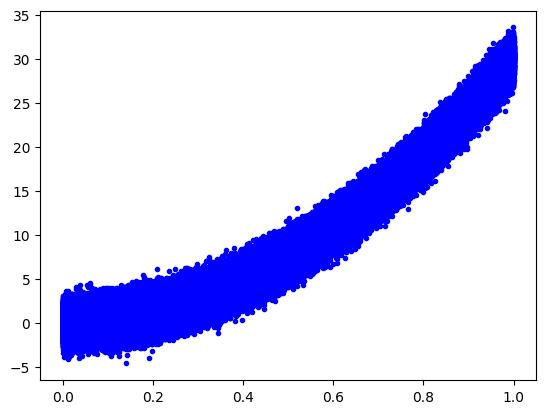

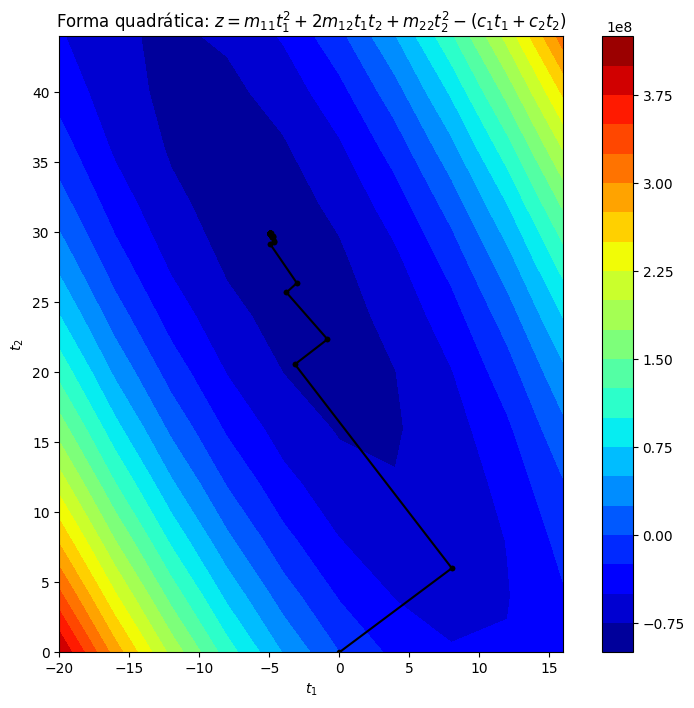

In [44]:
# Problem definition
n = 2
m = 1000000

np.random.seed(seed=123456)

# Generate some artificial data
A = np.zeros(shape=(m,n))
A[:,0] = 1.0
A[:,1] = np.random.rand(m)
b = 30*A[:,1]**2 + np.random.randn(m)
plt.plot(A[:,1],b,'.b')

# Build matrix and right hand side (normal equations)
M = np.dot(A.T,A)
c = np.dot(A.T,b)

# Plot example in R2
if(True):
    tx = np.arange(-20.0, 20.0, 4.0)
    ty = np.arange(0.0, 45.0, 4.0)
    xp,yp = np.meshgrid(tx,ty)
    zp = 0.5*(M[0,0]*xp**2 + 2.0*M[0,1]*xp*yp +  M[1,1]*yp**2) - (c[0]*xp + c[1]*yp)
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_aspect('equal')
    ax.set(xlabel='$t_1$', ylabel='$t_2$', title='Forma quadrática: $z = m_{11}t_1^2 + 2m_{12}t_1 t_2 + m_{22}t_2^2 - (c_1 t_1+ c_2 t_2)$')
    im = ax.contourf(xp, yp, zp, 20, cmap='jet')
    fig.colorbar(im, ax=ax)

# Minimization method
MAXIT = 100
TOLr = 1.0E-2 # ALTERADO AQUI!
x = np.zeros(2)
xold = np.zeros(2)
x1pl = np.zeros(2)
x2pl = np.zeros(2)
beta = 1
normr = []
sampling_stoch = 1e2 # ALTERADO AQUI!
mstoch = int(m / sampling_stoch) # if mstoch == m => deterministic
arr = np.arange(m)
error = 10*TOLr
num_iterations = [] # Vamos criar essa lista vazia para auxiliar no plot do gráfico iter x sampling stoch
for iter in range(MAXIT):

    if(sampling_stoch != 1): # Sample nstoch values
        kper = np.random.permutation(arr)[:mstoch]
        Asam = A[kper,:]
        bsam = b[kper]
        M = np.dot(Asam.T,Asam)
        c = np.dot(Asam.T,bsam)

    r = M @ x - c
    d = -r
    beta = d.T @ d / (d.T @ M @ d)

    xold[:] = x[:]
    x += beta*d

    if(True):
        x1pl[0] = xold[0]
        x1pl[1] = x[0]
        x2pl[0] = xold[1]
        x2pl[1] = x[1]
        plt.plot(x1pl, x2pl, '.-k')

    error = np.linalg.norm(x-xold)
    normr.append(error)
    print(iter, ' ', error)
    if(error < TOLr):
        break ;

    if(sampling_stoch != 1):
        num_iterations.append(iter)

print('\n\nGradient method solution:', x, '\n\n')


Inicialmente, mostremos os resultados para cada caso:  
- 1. sampling_stoch = 1; TOLr = 1e-8
- 2. sampling_stoch = 100; TOLr = 1e-2
- 3. sampling_stoch = 1000; TOLr = 1e-2
- 4. sampling_stoch = 10000; TOLr = 1e-2
- 5. sampling_stoch = 100000; TOLr = 1e-2

Segue, então, cada gráfico:

- **Gráfico 1:**
<br>
<img src='https://drive.google.com/uc?id=17AH9GfyapXyuH5Z5HVNxa7lPbCQI4k5X'>


- **Gráfico 2:**
<br>
<img src='https://drive.google.com/uc?id=1fInF1bMxzKwuePwgDoZRG_xnjVwAtZ0M'>


- **Gráfico 3:**
<br>
<img src='https://drive.google.com/uc?id=14clKyDR4_TnHe1fntcwmHjst4LhsUUgp'>


- **Gráfico 4:**
<br>
<img src='https://drive.google.com/uc?id=1KRa0u8PjeCkQvqrVgqs7XhVsYy92cK5i'>


- **Gráfico 5:**
<br>
<img src='https://drive.google.com/uc?id=111A8vdIYNY4V7eFOhpMh4CrN-ZwtUJwv'>




As imagens nos ostrama, por recurso gráfico, um minimizador funcional quadrático. É importante citar que este rescurso pode poupar tempo de cálculo na detrminação do gradiente, mas o custo a se pagar pode ser uma taxa de convergência menor.

Agora, dados os casos 2 ao 5, vamos plotar o gráfico que mostra quantas iterações o processo demora como função da *sampling_stoch*.

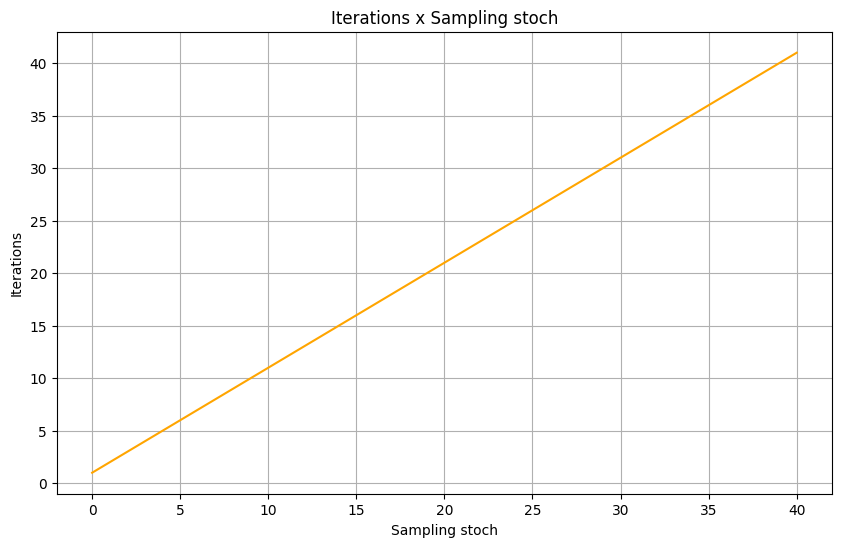

In [45]:
# Plot iterations vs. sampling stoch
plt.figure(figsize=(10,6))
plt.plot(num_iterations, range(1, len(num_iterations) + 1), color='orange')


plt.xlabel('Sampling stoch')
plt.ylabel('Iterations')
plt.title('Iterations x Sampling stoch')
plt.grid(True)
plt.show()


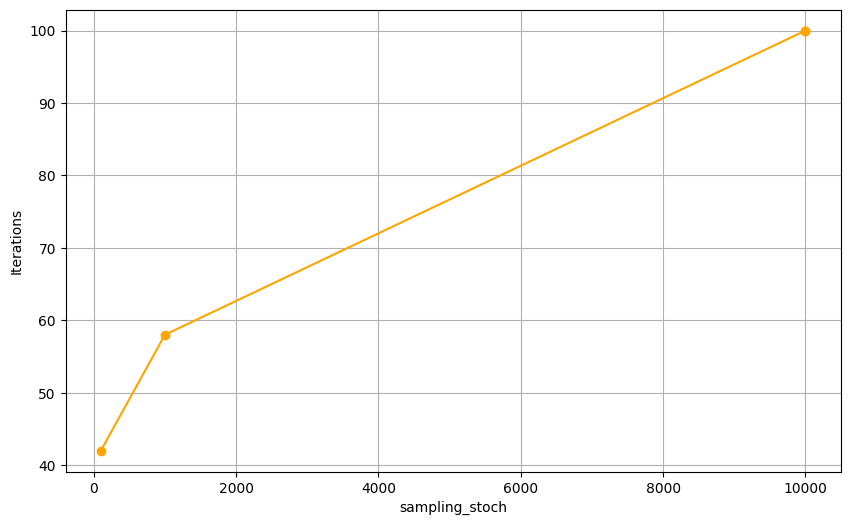

In [46]:
# Vms fazer na unha mesmo


x = [100,1000,10000,10000] #sampling_stoch
y = [41,58,99,99] #ultima iteracao
yref = [42,58,100,100]

plt.figure(figsize=(10,6))
plt.plot(x, yref, 'o-', color='orange')

#plt.plot(x,y,'-o')
#plt.xticks(np.arange(0,120000,20000))
plt.xlabel('sampling_stoch')
plt.ylabel('Iterations')
plt.grid(True)
plt.show()

Por fim, cabe explicar que foram feitos dois gráficos nesta parte para evidenciar o que ocorre, porém, aplicando duas abordagens diferentes de ver como a quantidade de iterações cresce junto com o crescimento da variável *sampling_stoch*.

#Parte 3: Interpolação, Integração e diferenciação numérica

##Exo. A: Interpolação Global

In [47]:
#Dados (por algum motivo se eu não os defini-los aqui de novo, estoura a RAM do colab kkkkk (deve-se criar um loop infinito em algum lugar, sla))
n, m = 8, 9
QB = 3
natm = n*m-1
nB = 0

def CH(x):
  return (2.3 + 10.0*np.exp(-(x-5)**2))

def CV(x):
  return (1.8 + 10.0*np.exp(-(x-5)**2))

Nesta primeira parte, vamos aplicar a interpolação global sobre a curva de potências gerada, tal que $x\in [1, 10]$.

Foram adotados, então, 10 pontos igualmente distribuídos no intervalo e gera-se, portanto,  a matriz de Vandermond correspondente  - função `np.vander()`. A partir da matriz, resolve-se o sistema linear $V \cdot c = W$, a fim de descobrir os coeficientes ($c$) do polinômio de 9º grau da interpolação.

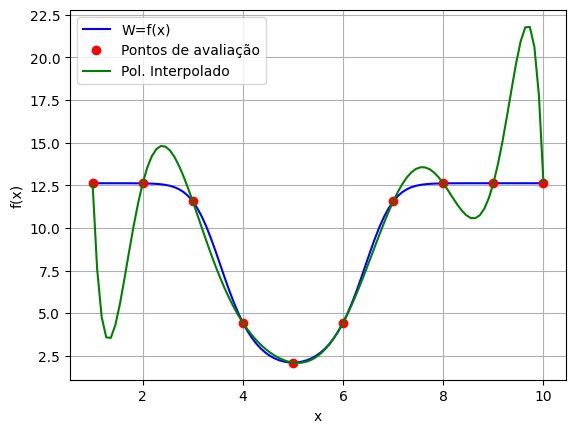

In [48]:
# Pontos no gráfico
x = np.linspace(1, 10, 100, endpoint=True)
W = []
for i in range(len(x)):
  W.append(potencia(n, m, natm, nB, QB, x[i]))

# Avaliação
xeval = np.linspace(1, 10, 10, endpoint=True)
yeval =[]
for i in range(len(xeval)):
  yeval.append(potencia(n, m, natm, nB, QB, xeval[i]))

# Agora sim podemos realizar a interpolação
V = np.vander(xeval)
c = np.linalg.solve(V, yeval)


# Com o vetor 'c', podemos plotar o gráfico com as curvas potencia, pol interpolado e com os pontos de análise destacados
plt.plot(x, W, '-b')
plt.plot(xeval, yeval, 'or')
plt.plot(x, np.polyval(c, x), '-', color='green')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['W=f(x)', 'Pontos de avaliação', 'Pol. Interpolado'])
plt.grid(True)
plt.show()

Uma vez definidos os coeficientes do polinômio, foi plotado um gráfico da **função de potências** e do **polinômio interpolado**.  

Nesse sentido, podemos verificar que a interpolação encontrada apresenta grandes desvios, principalmente nas extremidades do intervalo de análise, quando a curva de potência aproxima-se da função linear.

##Exo. B: Interpolação por partes: Lineares e Cúbicas (splines)

Pelos das pontos de avaliação já definidos, interpolemos novamente a função, utilizando desta vez a interpolação por partes, tanto cúbica quanto linear. Para isso, foram utlizadas as funções `scipy.interpolate.interp1d`, que retorna diretamente a função interpolada ao receber os pontos de avaliação e o modo de interpolação: ```linear``` ou ```cubic```.

In [49]:
# funcao interpolada
function_lin = interp1d(xeval, yeval, kind='linear')
function_cub = interp1d(xeval, yeval, kind='cubic')

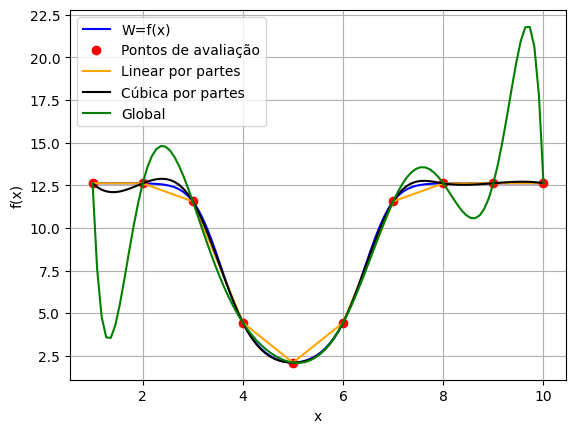

In [50]:
# A partir das duas novas interpolações, plota-se novamente um gráfico comparativo contendo a função original e as três interpolações produzidas, de forma a permitir um análise da qualidade de cada método.

plt.plot(x, W, '-b')
plt.plot(xeval, yeval, 'or')
plt.plot(x, function_lin(x), '-', color='orange')
plt.plot(x, function_cub(x), '-', color='black')
plt.plot(x, np.polyval(c, x), '-', color='green')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['W=f(x)', 'Pontos de avaliação', 'Linear por partes', 'Cúbica por partes', 'Global'])
plt.grid(True)
plt.show()

Observando nosso plot, nota-se que a **interpolação global** apresenta desvios consideráveis em relação a nossa $f(x)$ esperada, especialmente próximo aos limites do intervalo de análise.  

Além disso, verifica-se que a **interpolação linear por partes** apresenta um bom 'encaixe', apesar de não lidar bem com grandes curvaturas, de modo que não realiza a aproximação adequada.  

Por fim, a **interpolação cúbica por partes** realiza a melhor aproximção às curvas da função - pecando apenas próximo aos limites de análise -.

Para uma análise mais profunda da qualidade de cada aproximação, calculamos os erros para cada interpolação em relação ao esperado.  

Seguem as estatísticas: $R^{2}$, Mean Absolute Error (MAE) e Root Mean Squared Error (RMSE), os quais permitem, juntos, obter uma visão mais detalhada da qualidade de cada aproximação oferecida. Para isso, foram utilizadas funções da biblioteca `sklearn.metrics`.

In [51]:
r2 = []
mae = []
rmse = []

r2.append('R2')
mae.append('MAE')
rmse.append('RMSE')

r2.append(skl.r2_score(W, np.polyval(c, x)))
r2.append(skl.r2_score(W, function_lin(x)))
r2.append(skl.r2_score(W, function_cub(x)))

mae.append(skl.mean_absolute_error(W, np.polyval(c, x)))
mae.append(skl.mean_absolute_error(W, function_lin(x)))
mae.append(skl.mean_absolute_error(W, function_cub(x)))

rmse.append(skl.mean_squared_error(W, np.polyval(c, x), squared=True))
rmse.append(skl.mean_squared_error(W, function_lin(x), squared=True))
rmse.append(skl.mean_squared_error(W, function_cub(x), squared=True))


inputs = ['', 'global', 'linear', 'cubic']
data = np.array([inputs, r2, mae, rmse]).T
print(tabulate(data, headers='firstrow', tablefmt="fancy_grid", colalign=("center", "center", "center", "center")))

╒════════╤══════════╤══════════╤═══════════╕
│        │    R2    │   MAE    │   RMSE    │
╞════════╪══════════╪══════════╪═══════════╡
│ global │ 0.445109 │ 1.67224  │  9.18104  │
├────────┼──────────┼──────────┼───────────┤
│ linear │ 0.994291 │ 0.210524 │ 0.0944539 │
├────────┼──────────┼──────────┼───────────┤
│ cubic  │ 0.998251 │ 0.114196 │ 0.0289367 │
╘════════╧══════════╧══════════╧═══════════╛


A partir dos dados apresentados na tabela, podemos ver, como esperado pelo gráfico, que a **global** apresenta um maior erro associado, levando a uma curva muito distinta do esperado.  

Além disso, percebe-se que a **interpolação linear por partes** se aproxima consideravelmente do esperado, com $R^{2}$ próximo de 1 e tanto *MAE* quanto *RMSE* muito menores que a interpolação anterior - fica mais evidente ao aolhar para global -.  

Por fim, a **interpolação cúbica por partes** demonstra ser a mais precisa à curva de potências esperada, com o $R^{2}$ mais próximo de 1 e os menores erros em relação às demais aproximações.

##Exo. C: Integração

Neste exercício, serão aplicados diferentes métodos de **integração numérica** sobre a curva de potências obtida anteriromente, de modo que estudaremos os resultados apresentados para diferentes intervalos.

Serão aplicadas os seguintes métodos:
- Quadratura Composta de Ponto Médio;
- Regra do Trapézio Composta;
- Regra de Simpsom;
- Quadratura de Gauss.

Portanto, excluindo a Quadratura Composta de Ponto Médio, serão empregadas as funções da biblioteca `scipy.integrate` para a implementação dos métodos de integração.  

Nesse sentido, os métodos são aplicados para diferentes números de pontos, de 3 a 50 - dado que as instruções em sala nos mostram que menos pontos de análise podem não ser suficientes para alguns métodos, pois demoram mais a convergir ao resultado esperado -, de forma a analisar o comportamento das quadraturas em uma ampla gama de situações.  

A partir dos dados coletados, será gerada uma tabela contendo a aproximação obtida para cada método e cada número de pontos, determinando-se também o desvio do resultado em relação a uma estimativa obtida por meio da Quadratura de Gauss empregada a 200 pontos.

In [52]:
midpt = []
trap = []
simp = []
gauss = []

err_midpt = []
err_trap = []
err_simp = []
err_gauss = []


xref = np.linspace(1, 10, 1000, endpoint=True)
Wref = potencia_vet(xref)
aprox_ideal = integrate.simpson(Wref, xref)

midpt.append("Ponto Médio")
trap.append("Trapezoidal")
simp.append("Simpson")
gauss.append("Gauss")

err_midpt.append("Erro Ponto Médio")
err_trap.append("Erro Trapézio")
err_simp.append("Erro Simpsom")
err_gauss.append("Erro Gauss")

J = np.arange(2, 51) #intervalo de analise

for i in J:
    interval = 9.0/i

    Xinte = np.linspace(1 + interval/2, 10 - interval/2, i, endpoint=True)
    Winte = potencia_vet(Xinte)
    intervals = interval*np.ones(i)

    Xpont = np.linspace(1, 10, i, endpoint=True)
    Wpont = potencia_vet(Xpont)

    midpt_x = np.dot(intervals, Winte)
    trap_x = integrate.trapezoid(Wpont, Xpont)
    simp_x = integrate.simpson(Wpont, Xpont)
    gauss_x = integrate.fixed_quad(potencia_vet, 1, 10, n=i)[0]

    midpt.append(midpt_x)
    trap.append(trap_x)
    simp.append(simp_x)
    gauss.append(gauss_x)

    err_midpt.append(np.abs(midpt_x - aprox_ideal))
    err_trap.append(np.abs(trap_x - aprox_ideal))
    err_simp.append(np.abs(simp_x - aprox_ideal))
    err_gauss.append(np.abs(gauss_x - aprox_ideal))


entries = ['']
entries.extend(J)

data = np.array([entries, midpt, err_midpt, trap, err_trap, simp, err_simp, gauss, err_gauss]).T
print(tabulate(data, headers='firstrow', tablefmt="fancy_grid", colalign=(["center"]*9), floatfmt=".5E"))
print("\nAproximação esperada =", aprox_ideal)

╒════╤═══════════════╤════════════════════╤═══════════════╤═════════════════╤═════════════╤════════════════╤═════════════╤══════════════╕
│    │  Ponto Médio  │  Erro Ponto Médio  │  Trapezoidal  │  Erro Trapézio  │   Simpson   │  Erro Simpsom  │    Gauss    │  Erro Gauss  │
╞════╪═══════════════╪════════════════════╪═══════════════╪═════════════════╪═════════════╪════════════════╪═════════════╪══════════════╡
│ 2  │  1.02640E+02  │    1.80759E+01     │  1.13597E+02  │   2.90322E+01   │ 1.13597E+02 │  2.90322E+01   │ 1.10278E+02 │ 2.57141E+01  │
├────┼───────────────┼────────────────────┼───────────────┼─────────────────┼─────────────┼────────────────┼─────────────┼──────────────┤
│ 3  │  8.31136E+01  │    1.45080E+00     │  6.84201E+01  │   1.61443E+01   │ 5.33613E+01 │  3.12031E+01   │ 7.34184E+01 │ 1.11460E+01  │
├────┼───────────────┼────────────────────┼───────────────┼─────────────────┼─────────────┼────────────────┼─────────────┼──────────────┤
│ 4  │  8.41596E+01  │    4.04788E

A partir dos dados expostos na tabela, percebe-se que a Quadratura de Gauss é a que melhor se aproxima do valor esperado. No entanto, ao empregar um baixo número de pontos, nota-se que a Quadratura Composta de Ponto Médio apresenta, em geral, os menores erros.  

Quanto à Regra de Simpson, vemos que regularmente apresenta um grande aumento no erro, dependendo do número de pontos.  

Já a regra do Trapézio demonstra uma aproximação satisfatória, mas ainda inferior à Quadratura de Ponto Médio.

##Exo. D: Diferenciação

Uma vez integrada a curva de potências, vamos para sua diferenciação numérica, de modo que foram empregados três métodos:

- Forward Finite Difference;
- Backward Finite Difference;
- Centered Finite Difference.

In [53]:
#Implmentação do métodos, tal como na teoria

def forward_finite_difference(func, x, h):
    der = (func(x + h) - func(x)) / h
    return der

def backward_finite_difference(func, x, h):
    der = (func(x) - func(x - h)) / h
    return der

def centered_finite_difference(func, x, h):
    der = (func(x + h) - func(x-h)) / (2*h)
    return der

In [54]:
# Implementadas as funções, estas serão aplicadas sobre a curva de potências para diferentes valores do parametro h, armazenando os dados obtidos.

n = 10
H = np.linspace(0.01, 1, n, endpoint=True)

ffd = []
bfd = []
cfd = []

x = []

i = 0

for h in H:
    x.append(np.arange(1, 10 + h, h))
    ffd.append([])
    bfd.append([])
    cfd.append([])

    for j in x[i]:
        ffd[i].append(forward_finite_difference(potencia_vet, j, h))
        bfd[i].append(backward_finite_difference(potencia_vet, j, h))
        cfd[i].append(centered_finite_difference(potencia_vet, j, h/2))

    i += 1

 A partir da derivação da função em diferentes intervalos espaçados pelo intervalo h, temos os plots, também, dos gráficos correspondentes.

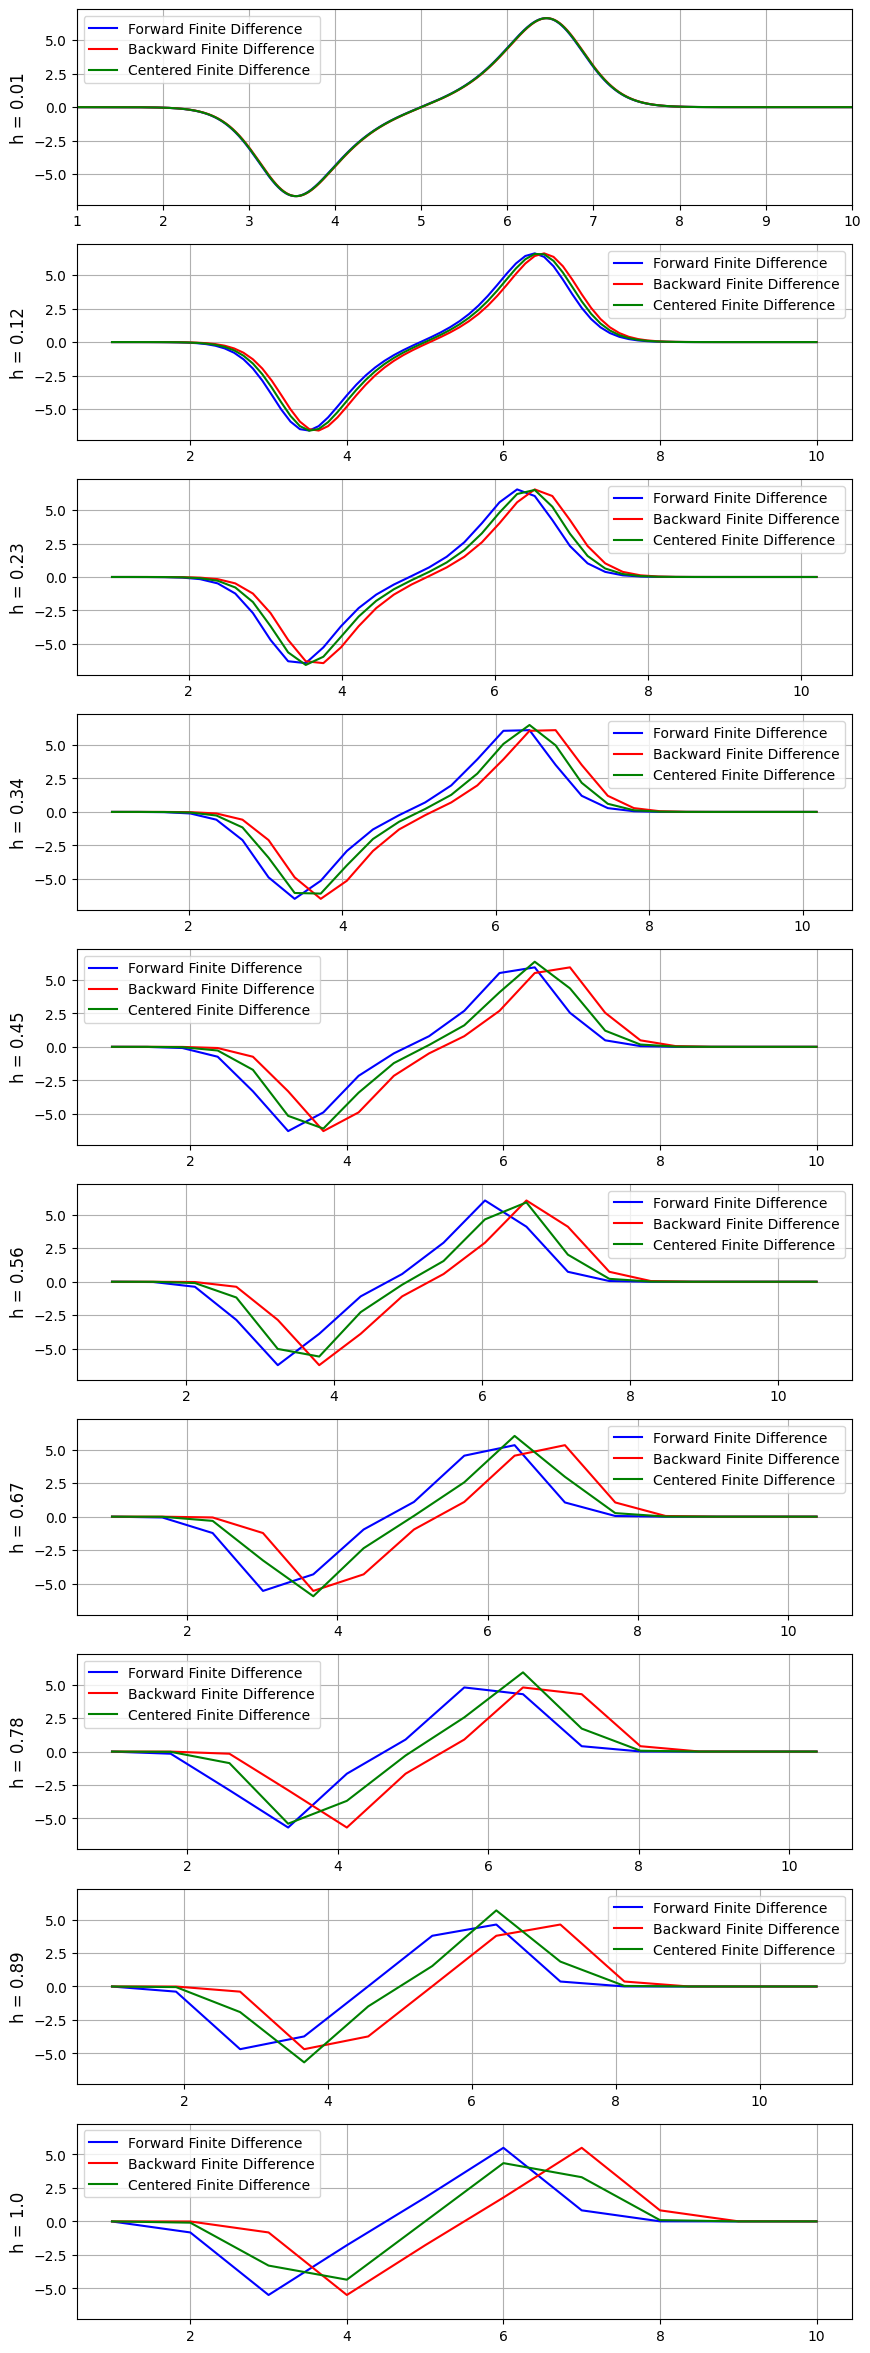

In [55]:
fig, ax = plt.subplots(n, figsize=(10,30), sharey=True)

for k in range(n):
    ax[k].plot(x[k], ffd[k], color='blue')
    ax[k].plot(x[k], bfd[k], color='red')
    ax[k].plot(x[k], cfd[k], color='green')

    ax[k].set_ylabel("h = {}".format(H[k]), size='large')
    ax[k].legend(['Forward Finite Difference', 'Backward Finite Difference', 'Centered Finite Difference'])
    ax[k].grid(True)

ax[0].set_xlim(1, 10)

plt.legend(['Forward Finite Difference', 'Backward Finite Difference', 'Centered Finite Difference'])
plt.show()

A partir dos gráficos, nota-se que quanto menor for o $h$, melhor a resolução da derivada numérica obtida, apesar de necessitar de mais cálculos para cobrir a função como um todo.

Além disso, comparando cada método de integração para um mesmo valor de $h$, é verificado que há uma "translação" entre estes, cuja magnitude depende de h.

Assim, o modo *centered* se encontra centrado, *backward* demonstra um avanço e *forward*, um atraso.

#Parte 4: Autovalores-Autovetores e Resolução de EDOs

## Exo. A.

O objetivo deste exercício é demonstrar um teorema que garante a solução de uma
EDO que descreve a evolução de um sistema utilizado para modelar as oscilações livres de uma membrana. Além disso, queremos demonstrar um esquema numérico resultante da aplicação do método $\alpha$ em um sistema de $n$ equações de primeira ordem.  

1. Seja o sistema
$$
MW'' + KW = 0
$$
tal que $M$ e $K$ sejam as matrizes de massa e rigidez, a partir das condições iniciais $W(0) = u_0$ e $W'(0) = v_0$.  
Vamos, agora, demonstrar que a igualdade é realmente válida, a partir de
$$
W(t) = \sum^{d}_{k=1} \Phi^{(k)}c_k sin(\omega_k + \phi_k)
$$
que os vetores $\Phi^{(k)}$ e as frequências $\omega_k$ são soluções do problema de autovalores generalizado  
$$
K\Phi^{(k)} = \omega_k^{2} M \Phi^{(k)}
$$
Além disso, também queremos determinar $c_k$ e $\phi_k$ a partir das condições iniciais.

2. Comecemos mostrando que $W(t)$ é solução da EDO. Nesse sentido, escrevamos a igualdade incial:
$$
MW'' + KW =
$$
$$
=-M\sum^{d}_{k=1} \Phi^{(k)}c_k \omega_k^{2} sin(\omega_k + \phi_k) + K\sum^{d}_{k=1} \Phi^{(k)}c_k sin(\omega_k + \phi_k)=
$$
$$
=-\sum^{d}_{k=1} \omega_k^{2} M \Phi^{(k)}c_k sin(\omega_k + \phi_k) + \sum^{d}_{k=1} K\Phi^{(k)}c_k sin(\omega_k + \phi_k)
$$
Donde $K\Phi^{(k)} = \omega_k^{2} M \Phi^{(k)}$, então
$$
-\sum^{d}_{k=1} \omega_k^{2} M \Phi^{(k)}c_k sin(\omega_k + \phi_k) + \sum^{d}_{k=1} K\Phi^{(k)}c_k sin(\omega_k + \phi_k) = 0
$$
como queriamos demonstrar.

3. Para encontrar as constantes, lembramos que
$$
(\Phi^{(j)})^T M\Phi^{(i)} = \delta_{ij} = \left \{ \begin{matrix} 1, & \mbox{se }\mbox{i = j} \\ 0, & \mbox{se}\mbox{ i }\neq\mbox{j} \end{matrix} \right.
$$
Portanto, dado que $i=j=k$, temos que
$$
(\Phi^{(k)})^T M\Phi^{(k)} = 1
$$
Nesse sentido, considerando a solução e tomando $t=0$, temos
$$
W(0) = u_0 = \sum^{d}_{k=1} \Phi^{(k)} c_k sin(\phi_k) \\
W'(0) = v_0 = \sum^{d}_{k=1} \Phi^{(k)} c_k \omega_k cos(\phi_k)\\
$$
Multiplicado, à esquerda, por $(\Phi^{(j)})^TM$, obtemos
$$
(\Phi^{(j)})^TMu_0 = (\Phi^{(j)})^TM\sum^{d}_{k=1} \Phi^{(k)} c_k sin(\phi_k) \\
(\Phi^{(j)})^TMv_0 = (\Phi^{(j)})^TM\sum^{d}_{k=1} \Phi^{(k)} c_k \omega_k cos(\phi_k)\\
$$
E da relação utilizada em (2.), vê-se que
$$
(\Phi^{(k)})^TMu_0 = c_k sin(\phi_k) \\
(\Phi^{(k)})^TMv_0 = c_k \omega_k cos(\phi_k)\\
$$
Portando, se falamos que $(\Phi^{(k)})^TMu_0 = a_k$ e que $(\Phi^{(k)})^TMv_0 = b_k$, tal que $a_k$, $b_k$ $\in \mathbb{R}$, conseguimos obter  
$$
\left \{ \begin{matrix} a_k = c_k sin(\phi_k) \\ b_k = c_k \omega_k cos(\phi_k) \end{matrix} \right.
$$
É evidente que o sistema é possível e determinado para cada iteração $k$, sendo, assim, possível determinar $c_k$ e $\phi_k$.  
Uma possível solução geral para a iteração $k$ é  
$$
% \omega_k = (\frac{b_k}{a_k})tg(\phi_k)\\
c_k^2 = a_k^2 + (\frac{b_k}{\omega_k})^2\\
\phi_k = tg^{-1}(\frac{a_k \omega_k}{b_k})
$$

## Exo. B.

Para o calcular os modos de oscilação, primeiro foi aletarada a função `BuildMatrizes()` para construir a matriz pentadiagonal de rigidez (K) e a matriz de massas (M) correspondente à uma membrana triangular, da forma como foi especificado no enunciado ($\rho$ = $e$ = 1).

In [56]:
def ij2n (i, j, N):
    return i + j*N

def BuildMatrizes(N1, N2, sigma, delta):
    nunk = N1*N2

    # Matriz K (rigidez)
    d1 = 4.0*np.ones(nunk)
    d2 = -np.ones(nunk-1)
    d3 = -np.ones(nunk-N1)
    K = (sigma/delta**2)*scipy.sparse.diags([d3, d2, d1, d2, d3], [-N1, -1, 0, 1, N1], format='csr')

    # Forçar os autovalores associados a pontos nas bordas a serem grandes se comparados com os modos fundamentais
    big_number = 200
    Iden = big_number*scipy.sparse.identity(nunk, format='csr')

    # Fixa esquerda e direita
    for k in range(0,N2):

        Ic = ij2n(0,k,N1) # ESQ
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

        Ic = ij2n(N1-1,k,N1) # DIR
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

    # Fixa em cima e em baixo
    for k in range(0,N1):

        Ic = ij2n(k,0,N1) # BOTTOM
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

        Ic = ij2n(k,N2-1,N1) # TOP
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

    # canto superior direito da membrana (para torna-la triangular)
    for i in range(N1):
        for j in range(N2):
            xi = i*delta
            yj = j*delta
            Ic = ij2n(i,j,N1)
            if(yj > (1 - xi)):
                K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

    # Matriz M (massa)
    M = scipy.sparse.identity(nunk, format='csr')
    for i in range(N1):
        for j in range(N2):
            xi = i*delta
            yj = j*delta
            eij = 1.0
            rhoij = 1.0
            Ic = ij2n(i,j,N1)
            M[Ic,Ic] = rhoij*eij

    return K, M

A partir das matrizes criadas para diferentes DISCRETIZAÇÕES ((21 x 21), (41 x 41) e (61 x 61)), são calculados os modos de oscilação da membrana pelo **Método de Francis**.

A seguir, as frequências correspondentes são dadas por meio da raiz dos autovalores determinados.

In [57]:
Ns = np.array([21, 41, 61])
L = 1.0
Q = []
omegas = []

for N in Ns:
    N1 = N2 = N
    delta = L / (N1-1)

    # Tensão da membrana
    sigma = 1.0

    # Aplicar restrições nas bordas
    K, M = BuildMatrizes(N1, N2, sigma, delta)

    # Calcular modos de oscilação
    Lam, Qtemp = scipy.linalg.eigh(K.todense(), M.todense())
    Q.append(Qtemp)

    omegas.append(np.sqrt(Lam))

Em seguida, as primeiras 3 frequências de oscilação para cada discretização:

In [58]:
f1 = ['N = (21 x 21)']
f2 = ['N = (41 x 41)']
f3 = ['N = (61 x 61)']

for i in range(3):
    f1.append(omegas[0][i])
    f2.append(omegas[1][i])
    f3.append(omegas[2][i])

k = (' ', '1', '2', '3')

data = np.array([k, f1, f2, f3]).T
print(tabulate(data, headers='firstrow', tablefmt="fancy_grid", colalign=(["center"]*4)))

╒═════╤═════════════════╤═════════════════╤═════════════════╕
│     │  N = (21 x 21)  │  N = (41 x 41)  │  N = (61 x 61)  │
╞═════╪═════════════════╪═════════════════╪═════════════════╡
│  1  │     6.91004     │     6.98289     │     6.93052     │
├─────┼─────────────────┼─────────────────┼─────────────────┤
│  2  │     9.77096     │     9.85802     │     9.78053     │
├─────┼─────────────────┼─────────────────┼─────────────────┤
│  3  │     11.1123     │     11.2423     │     11.1578     │
╘═════╧═════════════════╧═════════════════╧═════════════════╛


Para cada conjunto de pontos, obtemos a tabela de frequências de vibração correspondentes aos três primeiros modos da membrana.  
No geral, percebemos desvios menores que $2\%$ entre cada conjunto de pontos utilizados.

In [59]:
# As funções PlotMembrane() e PlotSurface() nos foram fornecidas, mas as alteramos para realizar a plotagem que queriamos.

# Função para plotar os curvas de nível constante de temperatura
def PlotaMembrane(N, L, Q, K):
    fig, ax = plt.subplots(K.size, N.size, figsize=(5 * N.size, 5 * K.size), sharex=True, sharey=True)
    i = 0
    for k in K:
        j = 0
        for n in N:
            mode = Q[j][:,k]
            mode[np.where(np.abs(mode) < 1e-10)] = 0.0

            Wplot = mode.reshape(n, n)

            x = np.linspace(0, L, n)
            y = np.linspace(0, L, n)
            X,Y = np.meshgrid(x,y)
            Z = np.copy(Wplot)

            ax[i][j].set_aspect('equal')
            ax[0][j].set(title='N = {} x {}'.format(n, n))
            im = ax[i][j].contourf(X, Y, Z, 20)
            im2 = ax[i][j].contour(X, Y, Z, 20, linewidths=0.25, colors='k')
            fig.colorbar(im, ax=ax[i][j])

            j += 1

        ax[i][0].set_ylabel("k = {}".format(k), size='large')
        i += 1



def PlotaSurface(N, L, Q, K):
    fig = plt.figure(figsize=(5 * N.size, 5 * K.size))
    i = 0
    for k in K:
        j = 0
        for n in N:
            mode = Q[j][:,k]
            mode[np.where(np.abs(mode) < 1e-10)] = 0.0

            Wplot = mode.reshape(n, n)

            x = np.linspace(0, L, n)
            y = np.linspace(0, L, n)
            X,Y = np.meshgrid(x,y)
            Z = np.copy(Wplot)

            ax = fig.add_subplot(K.size, N.size, j + i*N.size + 1, projection='3d')

            ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
            if i==0:
                ax.set(title='N = {} x {}'.format(n, n))
            ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=True)

            j += 1

        ax.set_ylabel("k = {}".format(k), size='large')
        i += 1

Seguem os plots dos modos de oscilação em uma dinâmica similar às curvas de nível, para visualização dos modos de oscilação pela função `PlotMembrane()`.

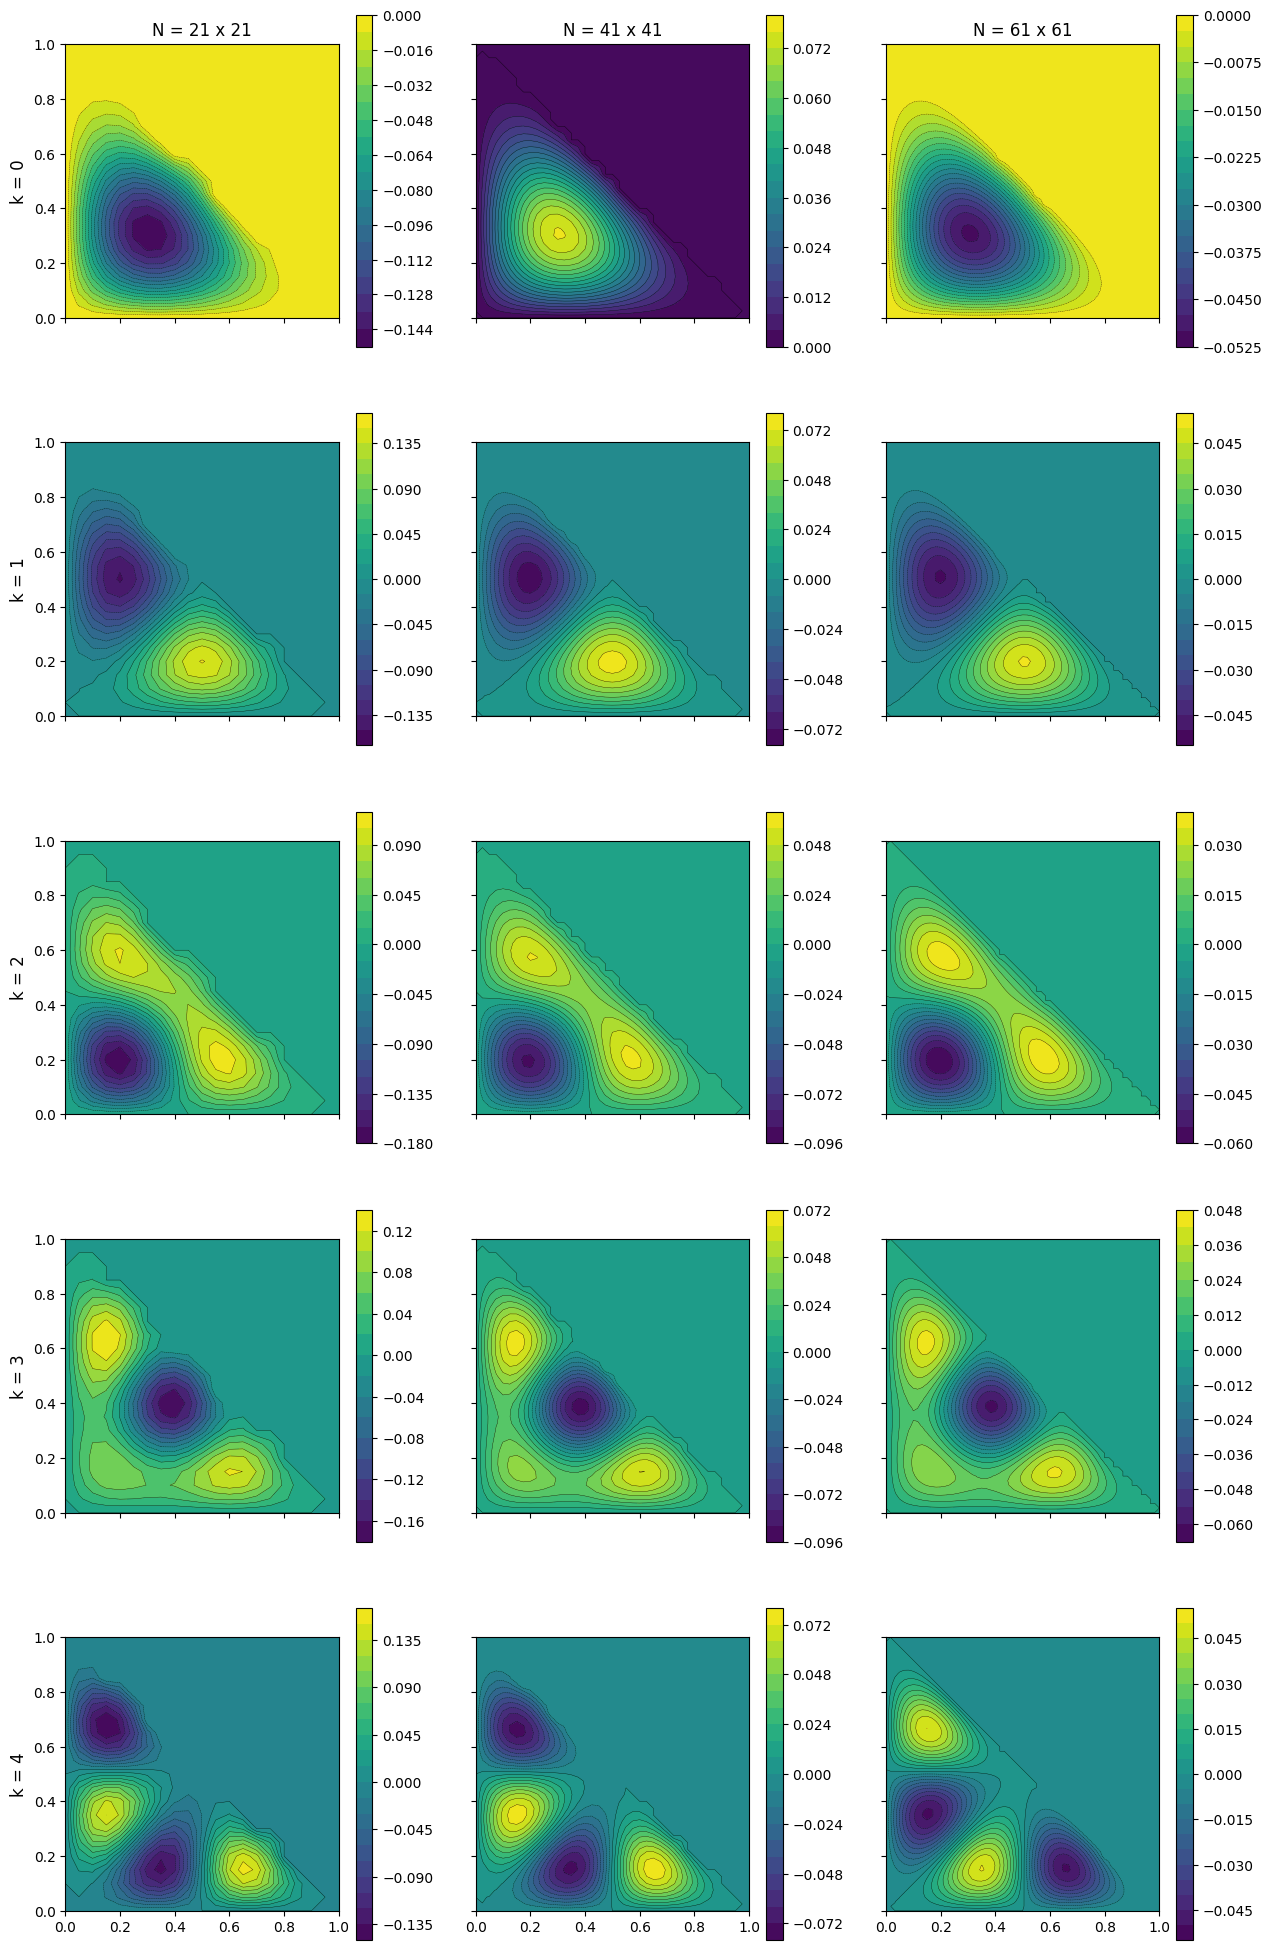

In [60]:
# Plots
Ks = np.arange(0, 5, 1)

PlotaMembrane(Ns, L, Q, Ks)

Para uma visualização mais clara, segue os seguintes plots das superfícies das membranas, para observar melhor como ocorrem as oscilações - através da função `PlotSurface()`.

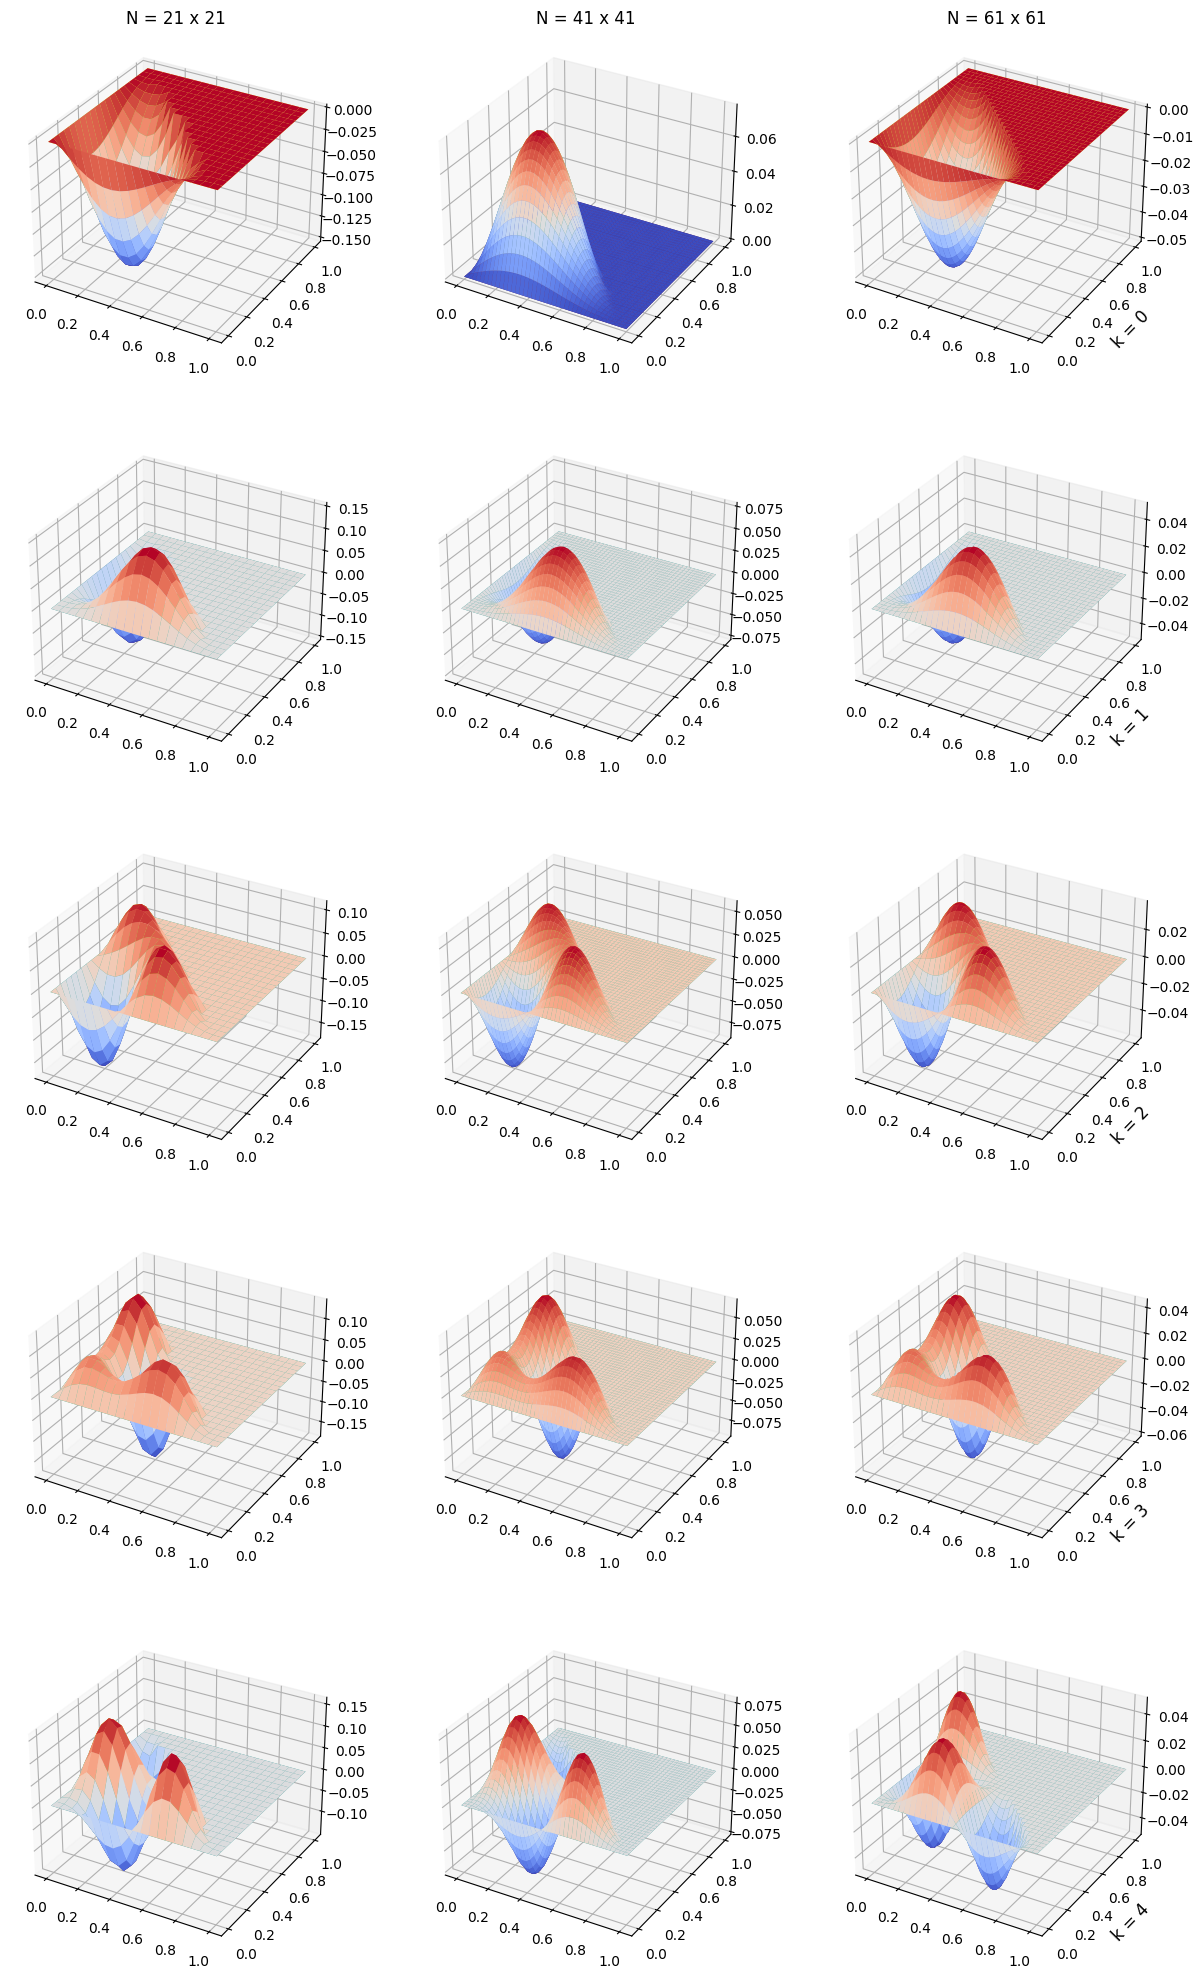

In [61]:
PlotaSurface(Ns, L, Q, Ks)

OUTRO EXOB DEEP


## Exo.C: EDOs

## 1.

Considerando a equação de segunda ordem

$$
LC\frac{d^2 v}{dt^2} + (\frac{L}{R_2} + R_1C)\frac{dv}{dt} + (\frac{R_1}{R_2} +1)v = e
$$

Tal que $v(t)$ é a diferença de potêncial do capacitor. Além disso, $v(0) = v'(0) = 0$.
Os parâmetro são $L = 0.1 $ $H$, $C = 1$ $mF$, $R_1 = R_2 = 10$ $\Omega$ e $e = 5$ $V$.

#### **(a)**
Para realização do **Método de Euler Explícito**, temos que realizar a seguinte mudança de varáveis:$$v' = y$$ $$v'' = y'$$
Desse modo, podemos reescrever a equação de segunda ordem:
$$
LCy' + (\frac{L}{R_2} + R_1C)y + (\frac{R_1}{R_2} +1)v = e\leftrightarrow
$$

$$
\leftrightarrow v'' = \frac{e}{LC} - (\frac{1}{R_2C}  + \frac{R_1}{L})v' - (\frac{R_1}{R_2} + 1)\frac{v}{LC}
$$

Temos, então que

$$
\begin{array}
vy' = \frac{e}{LC} - (\frac{1}{R_2C}  + \frac{R_1}{L})y - (\frac{R_1}{R_2} + 1)\frac{v}{LC} \\
v' = y \\
\end{array}
$$

#### **(b)**
Agora, reescrevendo na forma vetorial

$$
\begin{bmatrix}
y' \\
v' \\
\end{bmatrix}=
\begin{bmatrix}
-(\frac{1}{R_2C} + \frac{R_1}{L}) & - \frac{(R_1 + R_2)}{R_2CL} \\
 1&0\\
\end{bmatrix}.
\begin{bmatrix}
y \\
v \\
\end{bmatrix}+
\begin{bmatrix}
\frac{e}{LC} \\
0 \\
\end{bmatrix}
$$

Ou seja,
$$
\begin{bmatrix}
y' \\
v' \\
\end{bmatrix}=
\begin{bmatrix}
-200 & - 20000 \\
 1&0\\
\end{bmatrix}.
\begin{bmatrix}
y \\
v \\
\end{bmatrix}+
\begin{bmatrix}
50000 \\
0 \\
\end{bmatrix}
$$

Definimos, então, $\overrightarrow{u} = (y, v)$, de modo que
$$
(\overrightarrow{u})'=
\begin{bmatrix}
-200 & - 20000 \\
 1&0\\
\end{bmatrix}.
\overrightarrow{u}+
\begin{bmatrix}
50000 \\
0 \\
\end{bmatrix}→
$$

$$
→(\overrightarrow{u})'=
A.
\overrightarrow{u}+
b
$$

#### **(c)**
Dessa maneira, para aplicar o método, temos
$$
\begin{array}{l}
  (\overrightarrow{u})' = f(t, \overrightarrow{u})\\
  u(0) = (0, 0)\\
\end{array}
$$

Isto é,
$$
f(t, \overrightarrow{u}) = A.\overrightarrow{u} + b
$$

#### **(d)**
Por fim, implementa-se o método de Euler explícito, como solicitado, de modo que $h=0.001$. Além disso, vamos plotar $v(t)$ e sua derivada.

In [62]:
def ckt(y):
    A = [[-200, -20000], [1, 0]]
    b = [50000, 0]

    ynew = np.dot(A, y) + b

    return ynew


h = 0.001 #passo
ti = 0.0
tf = 0.1 #por inspeção, não faz muito sentido/ nao ha necessidade ir além disso

t = np.arange(ti, tf, h)
n = t.size

y = np.zeros(shape=(n,2))
y[0,0] = 0.0
y[0,1] = 0.0

# resolucao por Euler explicito
for i in range(n-1):
    y[i+1,:] = y[i,:] + h*ckt(y[i,:])

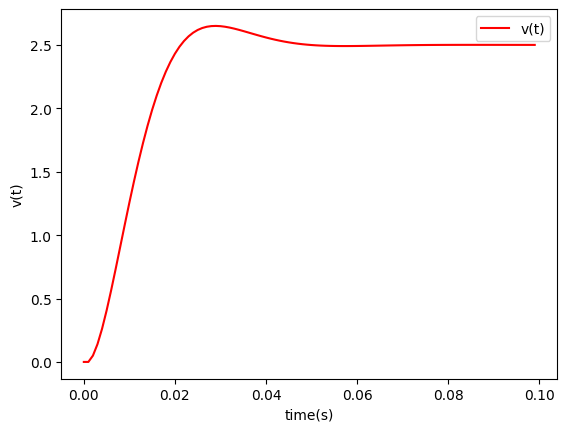

In [63]:
# plot v(t)

plt.plot(t,y[:,1], '-', color='red', label='v(t)')
plt.xlabel('time(s)')
plt.ylabel('v(t)')
#plt.grid()
plt.legend()

Pela análise gráfica, podemos perceber uma crescente de velocidade ao longo do tempo, de modo que a curva tende a estabilizar em um valor de velocidade especifico: 2.5.
É imporante ressaltar o pico de velocidade em aproximadamente $t=0.03$ $s$. Após isso, ocorre um leve descréscimo da velocidade até atingir a estabilidade.

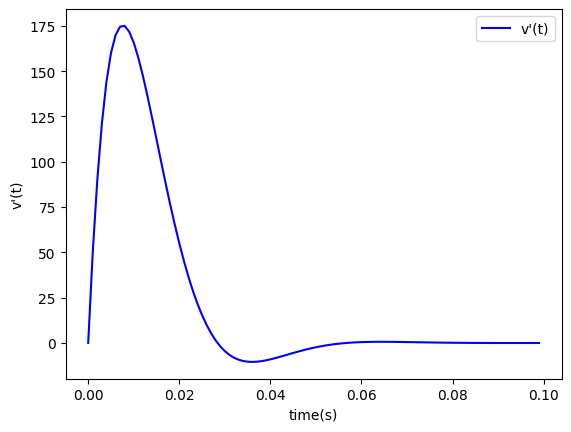

In [64]:
# plots v'(t)

plt.plot(t,y[:,0], '-', color='blue', label='v\'(t)')
plt.xlabel('time(s)')
plt.ylabel('v\'(t)')
#plt.grid()
plt.legend()

Observando, tal como no gráfico de $v(t)$, percebemos uma crescente da derivada, de modo qeu um pico é atingido em cerca de $t=0.01$ $s$. Após isso, há o descescimo da curva - tornando-a, inclusive, menor do qeu zero por alguns instantes (fisicamente, significaria uma inversão no sentido da aceleração) -, de modo que tente à estabilidade em zero.
Tal comportamento da nossa curva é coerente com o esperado pelo ponto $v'=0$ e o máximo da velocidade.

##2.

Considerando o sistema de $n$ equações de primeira ordem:
\begin{equation}
  \left \{
  \begin{array}{cc}
  y' = f(y)\\
  y(0) = y_0\\
  \end{array}
  \right.
\end{equation}

em que $f(y)$ é **linear**:
$$f(y) = Ay$$ tal que $A\in \mathbb{R}^{nxn}$.

Aplicando o **Método $\alpha$**, isto é
$$y_{n+1} = y_n + hf(\alpha y_{n+1} + (1-\alpha)y_n)$$, com $\alpha \in [0,1]$

1. Queremos demonstrar que a expressão acima pode ser reescrita como $$y_{n+1} = By_n$$ em que $B \in \mathbb{R}^{nxn}$ é a matriz $$B=[I-h\alpha A]^{-1}[I + h(1-\alpha)A]$$ de modo que $I$ é a identidade de ordem $n$.

2. Após isso, queremos demonstrar que $$y_{n+1} = B^{n+1}y_0$$  


Para o primeiro item, vamos desenvolver a expressão obtida pelo método $\alpha$:
$$
y_{n+1} = y_n + hf(\alpha y_{n+1} + (1-\alpha)y_n)
$$  
$$
= y_n + h[A(\alpha y_{n+1} + (1-\alpha)y_n)]
$$  
$$
= (I+h)y_n + h\alpha Ay_{n+1} -h\alpha y_n
$$  
$$
(I-h\alpha A)y_{n+1} = (I+h(1- \alpha))y_n
$$  
Desse modo, aplicando a inversa de ambos os lados da igualdade  
  
$$
[I-h\alpha A]^{-1}[I-h\alpha A]y_{n+1} = [I-h\alpha A]^{-1}(I+h(1- \alpha))y_n
$$  
Assim, como queriamos demonstrar,  
$$
Iy_{n+1} = [I-h\alpha A]^{-1}[I+h(1- \alpha)]y_n
$$  
$$
y_{n+1}= By_n
$$  
Para o seguindo item, realizaremos, apenas um processo produtório
$$y = By_0$$
$$y_2 = By$$
$$y_3 = By_2$$
$$...$$
$$y_n = By_{n-1}$$
$$y_{n+1} = By_n$$  
Realizadno a substituição de todas as expressões na última, temos que  

$$y_{n+1} = B(B(y_{n-1})) = B(B(B(y_{n-2}))) = ... = BB...B(By_0)$$  
Logo, como queriamos demonstrar,  
$$y_{n+1} = (BBB...BB)y_0 = B^{n+1}y_0$$

##3.

Para este exercício, uma vez que queremos visualizar o comportamento de um pêndulo duplo - cujo movimetno é descrito por EDOs -, precisamos vetorizar as equações fornecidas pelo enunciado, de modo que $\overrightarrow{y} = (\theta_1, \theta_2, \omega_1, \omega_2)$.

In [65]:
# Definindo a função y' = f(t, y)

L1 = L2 = 1
g = 9.81 #da uma vontade usar 10 kkkkk


def func(t,y, m1, m2):
    ynew = np.zeros(4)

    ynew[0] = y[2]
    ynew[1] = y[3]

    ynew[2] = (-g*(2*m1 + m2)*np.sin(y[0]) - g*m2*(y[0] - 2*y[1]) - 2*np.sin(y[0] - y[1])*(y[3]**2 * L2 + y[2]**2 * L1 * np.cos(y[0] - y[1])))/(L1*(2*m1 + m2 - m2*np.cos(2*y[0]-2*y[1])))

    ynew[3] = (2*np.sin(y[0] - y[1])*(y[2]**2 * L1*(m1 + m2) + g*(m1 + m2)*np.cos(y[0]) + y[3]**2 * L2*np.cos(y[0] - y[1])))/(L2*(2*m1 + m2 - m2*np.cos(2*y[0] - 2*y[1])))

    return ynew

Uma vez que definimos a função _func()_, ela é usada na resolução do sistema de EDOs pela função `scipy.integrate.solve_ivp`, utilizando o método *RK45*.

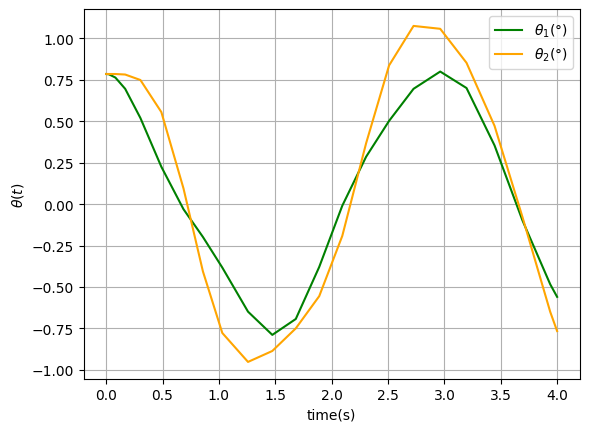

In [66]:
# Exemplo de aplicação da função, adotando m1 = m2 = 2 e reprentando os ângulos \theta em função do tempo.


m1 = m2 = 2
sol = scipy.integrate.solve_ivp(func, [0, 4], [np.pi/4, np.pi/4, 0, 0], args=(m1, m2))


# plots
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], '-', color='green', label=fr"$\theta_1$$(°)$")
ax.plot(sol.t, sol.y[1], '-', color='orange', label=fr"$\theta_2$$(°)$")
ax.set(xlabel='time(s)', ylabel=fr"$\theta (t)$")

plt.legend()
plt.grid(True)
plt.show()

Agora vem aquelas. Vamos animar o deslocamento do pêndulo - utilizaremos alguns conjuntos de massas $m_1$ e $m_2$ para observar o comportamento do pêndulo, tal como sugerido pelo enunciado.
- $m_1 = 5, m_2 = 5$ *(0)*
- $m_1 = 9, m_2 = 1$ *(1)*
- $m_1 = 2, m_2 = 10$ *(2)*

Com isso, os resultados de cada animação serão salvos no final da execução, com o número ao final do título correspondendo aos casos acima. Destaca-se que o ponto preto representa o ponto de fixação do pêndulo, o ponto azul a massa $m1$ e o ponto vermelho a massa $m2$.

In [67]:
fps = 5 #frames por segundo

#ajeitando a posição do pendulo
xi = 0
yi = 2

# posicao da massa, dado o angulo
def pos(theta, L, cx, cy):
    x = cx + L*np.sin(theta)
    y = cy - L*np.cos(theta)
    return x, y


# update da funcao para a animacao
def update_plot(frame_number, y, plot):
    x1, y1 = pos(y[0][frame_number], L1, xi, yi)
    x2, y2 = pos(y[1][frame_number], L2, x1, y1)
    ax.clear()

    #plot do pendulo
    ax.set_aspect('equal')
    ax.set_xlim(-2,2)
    ax.set_ylim(-1,3)
    plot = [ax.plot(xi, yi, 'o', color='black'), ax.plot(x1, y1, 'o', color='blue'), ax.plot(x2, y2, 'o', color='green'), ax.plot([xi, x1, x2], [yi, y1, y2], '-', color='red', linewidth='0.8')]

anim0 generated

anim1 generated

anim2 generated



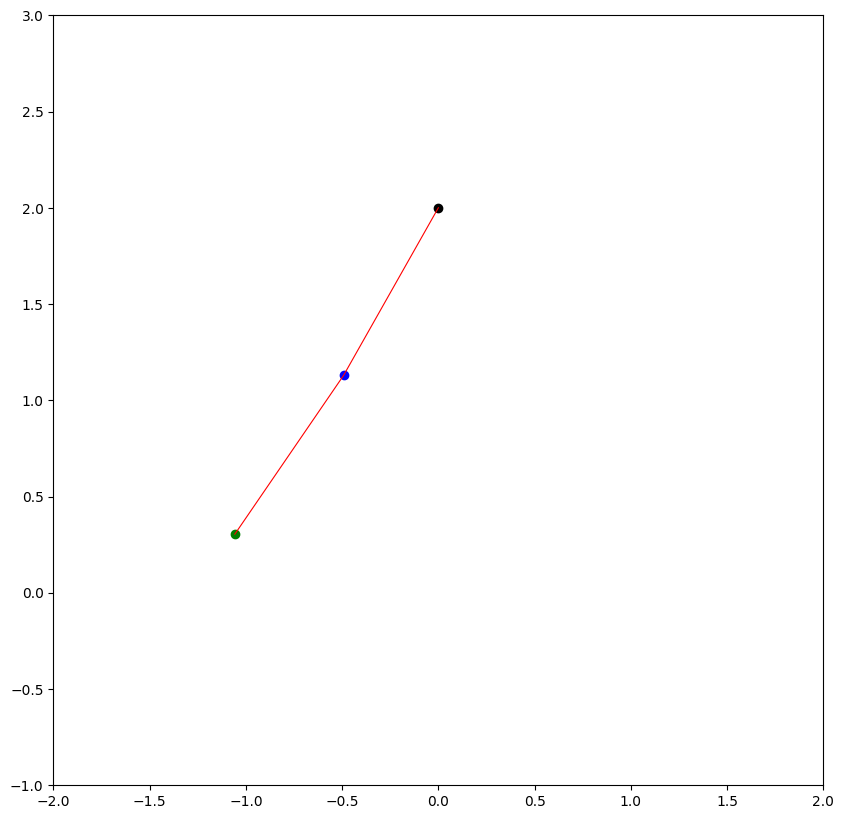

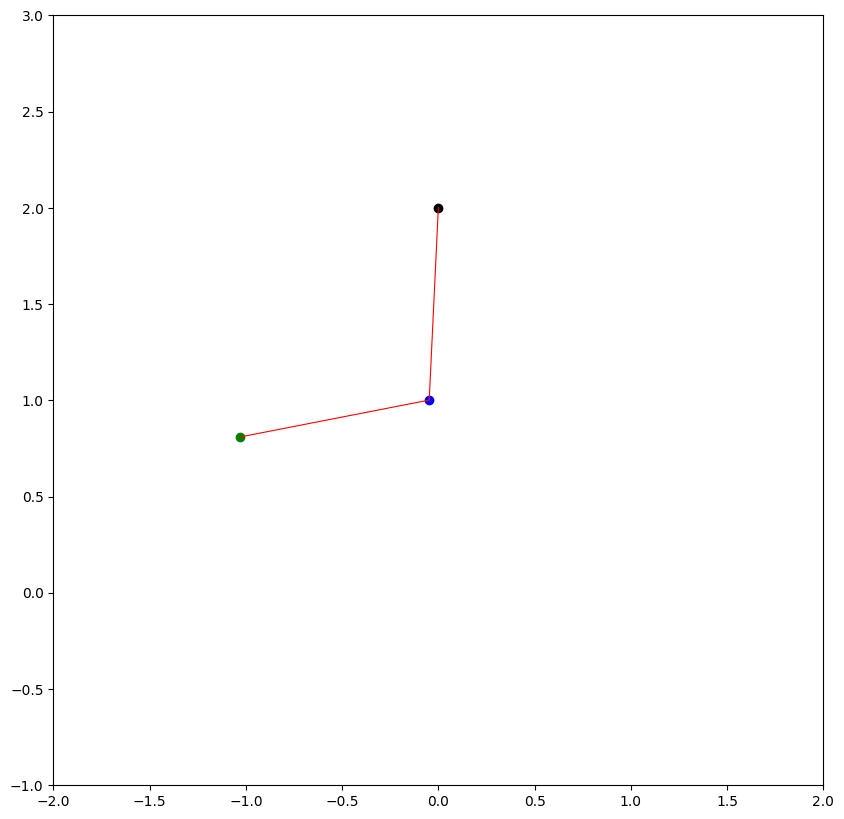

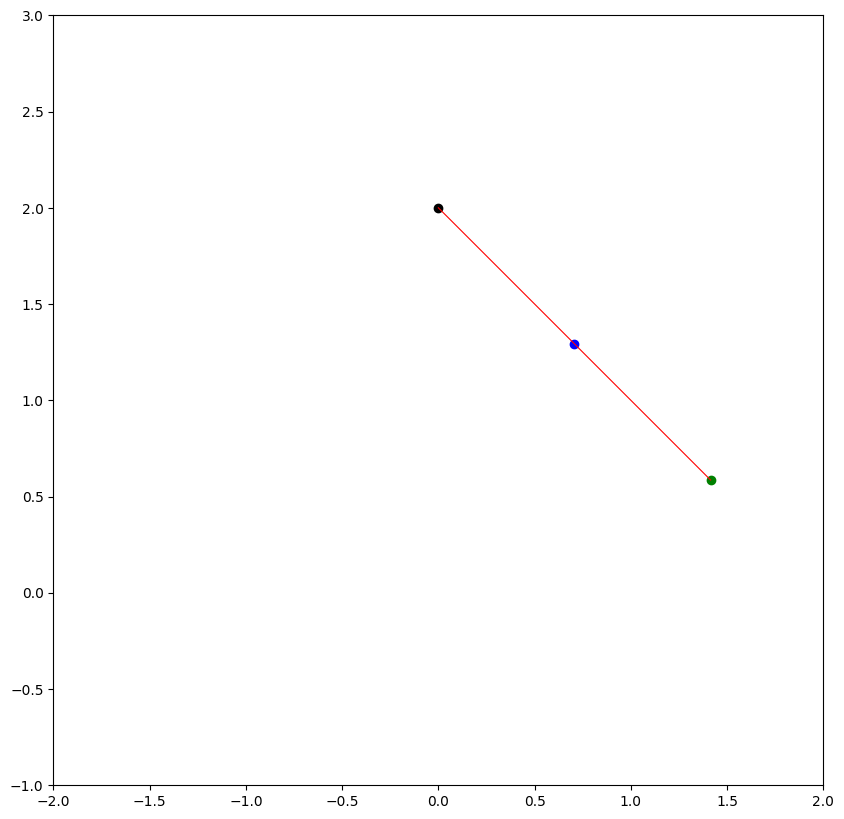

In [68]:
m1 = [5, 10, 2]
m2 = [5, 1, 10]

for i in range(3):
    #RK45 para as massas dadas
    sol = scipy.integrate.solve_ivp(func, [0, 4], [np.pi/4, np.pi/4, 0, 0], args=(m1[i], m2[i]))
    frame_number = sol.t.size

    #calculo posicao inicial
    x1, y1 = pos(sol.y[0][0], L1, xi, yi)
    x2, y2 = pos(sol.y[1][0], L2, x1, y1)

    #inicio do plot
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set_xlim(-2,2)
    ax.set_ylim(-1,3)
    ax.set(xlabel='x', ylabel='y', title='Pêndulo')
    plot = [ax.plot(xi, yi, 'o', color='black'), ax.plot(x1, y1, 'o', color='blue'), ax.plot(x2, y2, 'o', color='green'), ax.plot([xi, x1, x2], [yi, y1, y2], '-', color='red', linewidth='0.8')]

    #animar de acordo com update_plot()
    ani = animation.FuncAnimation(fig, update_plot, frame_number, fargs=(sol.y, plot), interval=1000/fps)

    #save
    fn = 'anim' + str(i)
    ani.save(fn+'.mp4',writer='ffmpeg',fps=fps)
    print(fn + ' generated\n')

Pelas animações, fica claro a coerência dos resultados, dados os casos esperados. Desse modo, denota-se a eficácia do método numérico para esses estudos de alta complexidade analítica.